Shape: (293, 2)
Columns: ds    object
y      int64
dtype: object
Missing values:
 y    0
dtype: int64


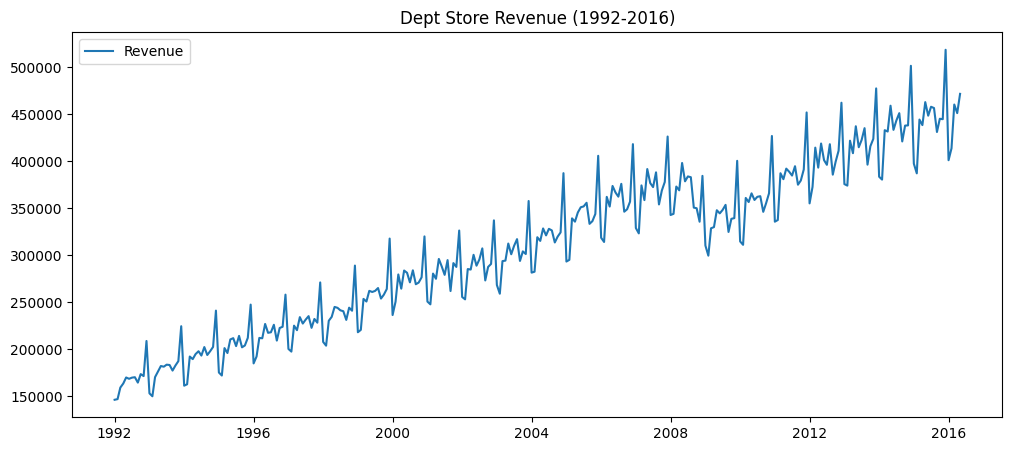

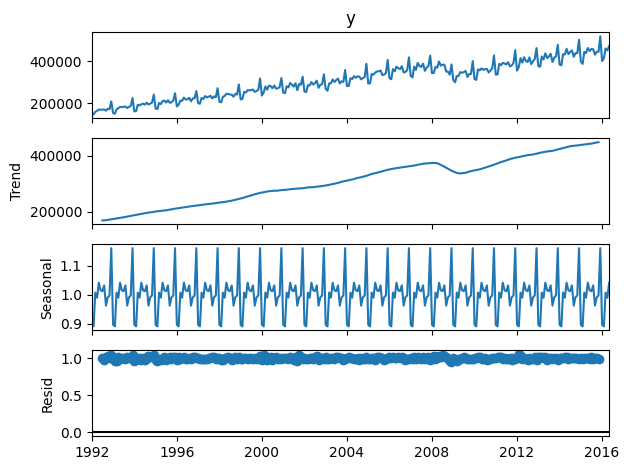

ADF Statistic: -0.6443250505938618
p-value: 0.8606486181958648
Series is NON-stationary -> Differencing required [2 marks]


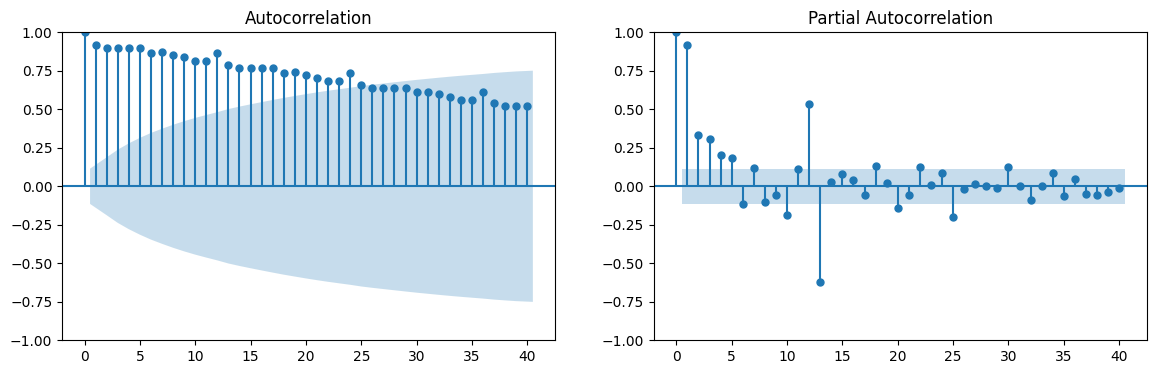

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  234
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2677.942
Date:                Sun, 21 Sep 2025   AIC                           5361.883
Time:                        03:25:46   BIC                           5372.236
Sample:                    01-01-1992   HQIC                          5366.058
                         - 06-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0338      0.071      0.479      0.632      -0.105       0.172
ma.L1         -0.7800      0.056    -13.888      0.000      -0.890      -0.670
sigma2      5.505e+08    8.9e-12   6.18e+19      0.0

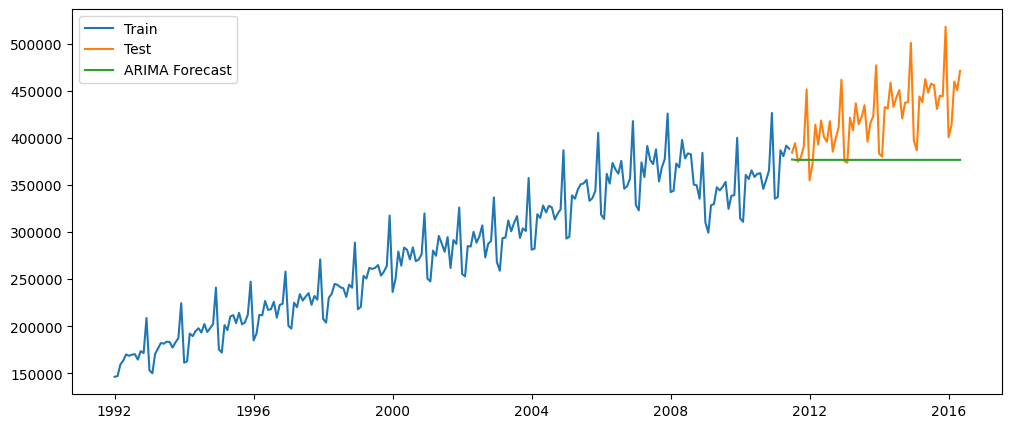

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


HW RMSE: 17922.813193109298
HW MAPE: 0.03664489957006759


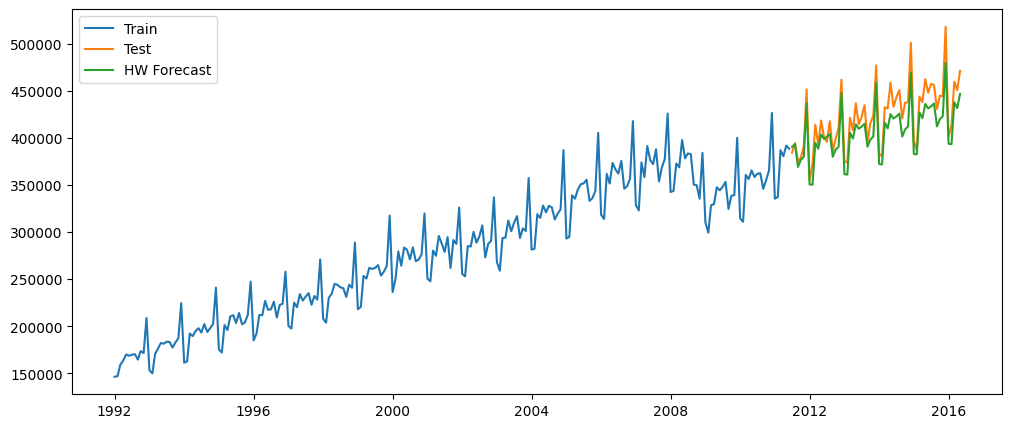

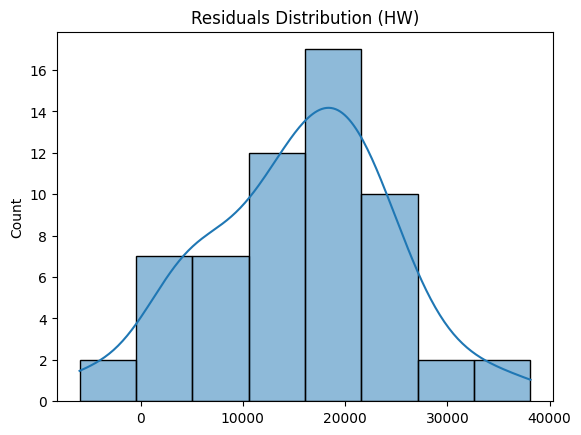

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Improved HW RMSE: 15554.401467802096
Improved HW MAPE: 0.03252863700508392


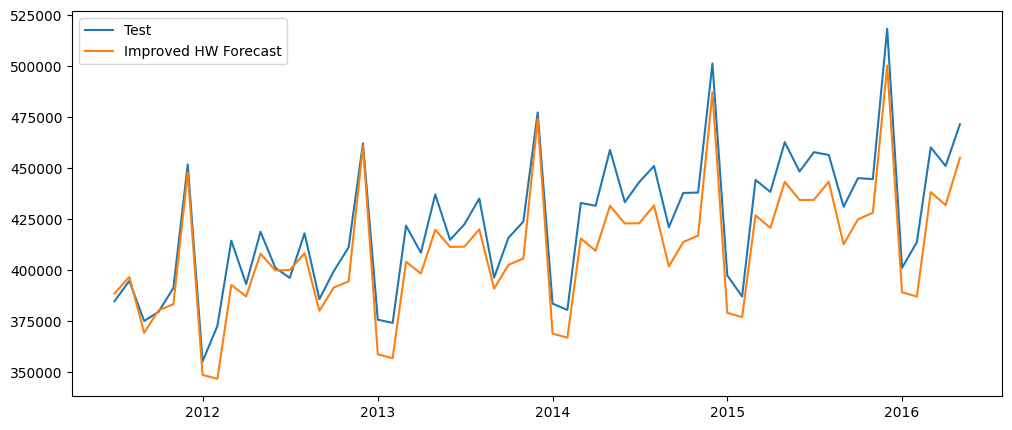

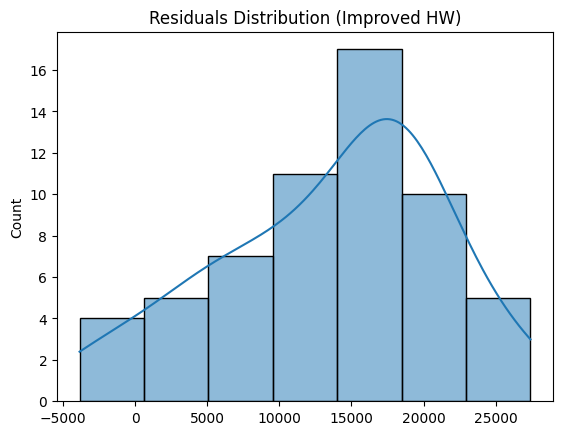

Next 30 days forecast:
 2011-07-01    388382.613810
2011-08-01    396452.931747
2011-09-01    369068.525590
2011-10-01    380125.510706
2011-11-01    383100.095404
2011-12-01    447856.593941
2012-01-01    348412.832188
2012-02-01    346533.044895
2012-03-01    392587.630779
2012-04-01    386942.490814
2012-05-01    407864.142327
2012-06-01    399717.449079
2012-07-01    399869.166251
2012-08-01    408149.339565
2012-09-01    379930.316860
2012-10-01    391285.342430
2012-11-01    394319.806536
2012-12-01    460940.871883
2013-01-01    358567.106162
2013-02-01    356608.064467
2013-03-01    403974.043305
2013-04-01    398138.115213
2013-05-01    419636.719404
2013-06-01    411227.195527
2013-07-01    411355.718691
2013-08-01    419845.747383
2013-09-01    390792.108131
2013-10-01    402445.174154
2013-11-01    405539.517669
2013-12-01    474025.149825
Freq: MS, dtype: float64


In [2]:
# =========================
# Time Series Forecasting - Dept Store Sales (Feb 2025 paper)
# Section B (40 marks) + Section C (40 marks)
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# ========== Section B (40 marks) ==========

# (a) Load dataset [2 marks] + Convert to time series [3] + check defects [2] + visualize [3] = 10 marks
df = pd.read_csv("dept_store_sales.csv")
print("Shape:", df.shape)
print("Columns:", df.dtypes)

# Ensure date column is datetime
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds')

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Plot time series
plt.figure(figsize=(12,5))
plt.plot(df['y'], label="Revenue")
plt.title("Dept Store Revenue (1992-2016)")
plt.legend()
plt.show()

# (b) Decompose [4 marks]
decomp = sm.tsa.seasonal_decompose(df['y'], model='multiplicative', period=12)
decomp.plot()
plt.show()

# Stationarity test (ADF) [3 marks]
adf_result = adfuller(df['y'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("Series is NON-stationary -> Differencing required [2 marks]")

# Plot ACF and PACF [3+3 marks]
fig, axes = plt.subplots(1,2, figsize=(14,4))
sm.graphics.tsa.plot_acf(df['y'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['y'], lags=40, ax=axes[1])
plt.show()

# (c) Train-Test split (80-20) [5 marks]
n = len(df)
train_size = int(0.8*n)
train, test = df['y'][:train_size], df['y'][train_size:]

# Fit ARIMA [10 marks]
# (p,d,q) can be chosen based on ACF/PACF, here using (1,1,1) as an example
arima_model = ARIMA(train, order=(1,1,1))
arima_res = arima_model.fit()
print(arima_res.summary())

# Forecast on test set
arima_forecast = arima_res.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, arima_forecast))
mape = mean_absolute_percentage_error(test, arima_forecast)
print("ARIMA RMSE:", rmse)
print("ARIMA MAPE:", mape)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.show()

# ========== Section C (40 marks) ==========

# (a) Exponential Smoothing (Holt-Winters) [15 marks]
# Start simple additive seasonality/trend
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))

rmse_hw = np.sqrt(mean_squared_error(test, hw_forecast))
mape_hw = mean_absolute_percentage_error(test, hw_forecast)
print("HW RMSE:", rmse_hw)
print("HW MAPE:", mape_hw)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, hw_forecast, label="HW Forecast")
plt.legend()
plt.show()

# Residual analysis
residuals = test - hw_forecast
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (HW)")
plt.show()

# (b) Improve model [10 + 5 marks]
# Try multiplicative seasonal if variance grows
hw_model2 = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_forecast2 = hw_model2.forecast(len(test))

rmse_hw2 = np.sqrt(mean_squared_error(test, hw_forecast2))
mape_hw2 = mean_absolute_percentage_error(test, hw_forecast2)
print("Improved HW RMSE:", rmse_hw2)
print("Improved HW MAPE:", mape_hw2)

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label="Test")
plt.plot(test.index, hw_forecast2, label="Improved HW Forecast")
plt.legend()
plt.show()

# Residual check
residuals2 = test - hw_forecast2
sns.histplot(residuals2, kde=True)
plt.title("Residuals Distribution (Improved HW)")
plt.show()

# (c) Final Forecast for next 30 days [10 marks]
final_model = hw_model2
future_forecast = final_model.forecast(30)
print("Next 30 days forecast:\n", future_forecast)

In [3]:
# Analyze residuals using Ljung-Box test
# The Ljung-Box test checks for autocorrelation in the residuals.
# A high p-value (typically > 0.05) suggests that the residuals are independent (no autocorrelation).

from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate residuals for the improved Holt-Winters model
residuals_hw2 = test - hw_forecast2

# Perform Ljung-Box test on the residuals
# lags can be set to a reasonable number, e.g., 10 or 20
ljungbox_results = acorr_ljungbox(residuals_hw2, lags=[10, 20])

print("\n--- Ljung-Box Test Results (Improved HW Residuals) ---")
print(ljungbox_results)
print("-----------------------------------------------------")

# Interpretation:
# If the p-value(s) are greater than 0.05, we fail to reject the null hypothesis,
# suggesting that the residuals are not significantly different from white noise
# (i.e., no significant autocorrelation).


--- Ljung-Box Test Results (Improved HW Residuals) ---
      lb_stat     lb_pvalue
10  41.851753  7.968064e-06
20  71.043584  1.229188e-07
-----------------------------------------------------


In [4]:
# Display performance metrics for ARIMA and Holt-Winters models
print("--- Model Performance Comparison ---")
print(f"ARIMA RMSE: {rmse:.2f}")
print(f"ARIMA MAPE: {mape:.4f}")
print(f"Holt-Winters (Additive) RMSE: {rmse_hw:.2f}")
print(f"Holt-Winters (Additive) MAPE: {mape_hw:.4f}")
print(f"Holt-Winters (Multiplicative) RMSE: {rmse_hw2:.2f}")
print(f"Holt-Winters (Multiplicative) MAPE: {mape_hw2:.4f}")
print("----------------------------------")

# Interpret the results:
# Lower RMSE and MAPE values indicate better model performance.
# In this case, the Holt-Winters models (especially the multiplicative one)
# appear to perform better than the ARIMA model based on these metrics.

--- Model Performance Comparison ---
ARIMA RMSE: 56709.20
ARIMA MAPE: 0.1062
Holt-Winters (Additive) RMSE: 17922.81
Holt-Winters (Additive) MAPE: 0.0366
Holt-Winters (Multiplicative) RMSE: 15554.40
Holt-Winters (Multiplicative) MAPE: 0.0325
----------------------------------


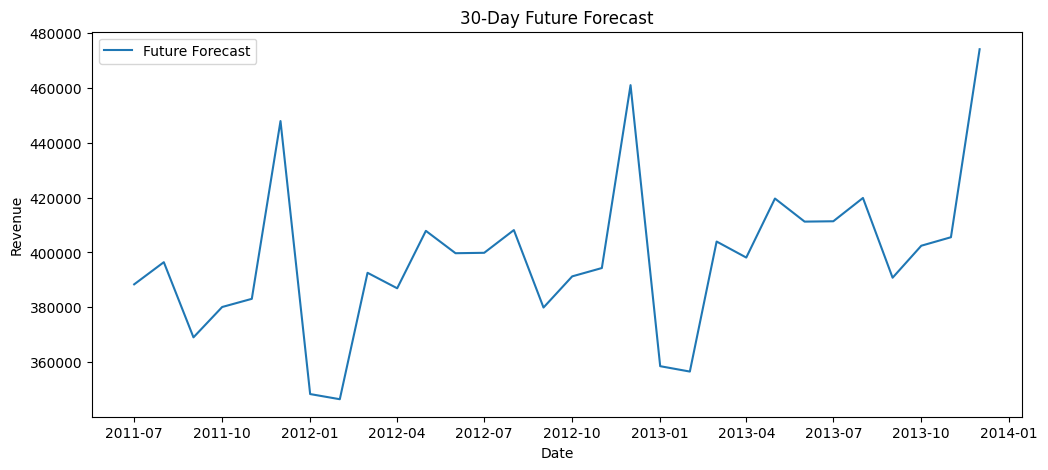

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(future_forecast.index, future_forecast, label="Future Forecast")
plt.title("30-Day Future Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

Rows,Cols: (113, 2)
Columns and dtypes:
 Date        object
airmiles     int64
dtype: object
Using value column: airmiles
Head:
             airmiles
Date                
1996-01-01  30983174
1996-01-02  32147663
1996-01-03  38342975
1996-01-04  35969113
1996-01-05  36474391

Missing values:
 airmiles    0
dtype: int64


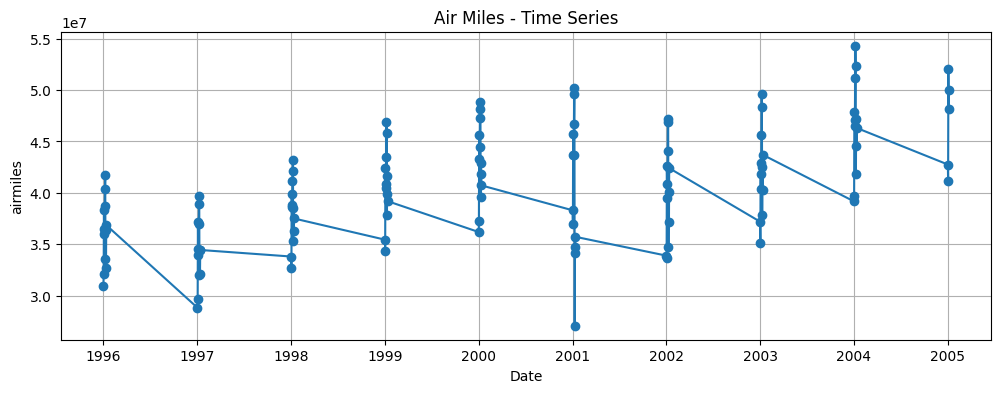

Plotting additive decomposition (inspect trend/seasonal/resid).


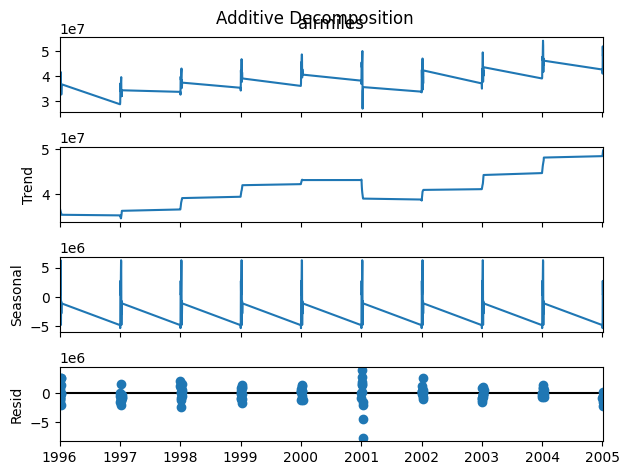

Plotting multiplicative decomposition (inspect if seasonality scales with level).


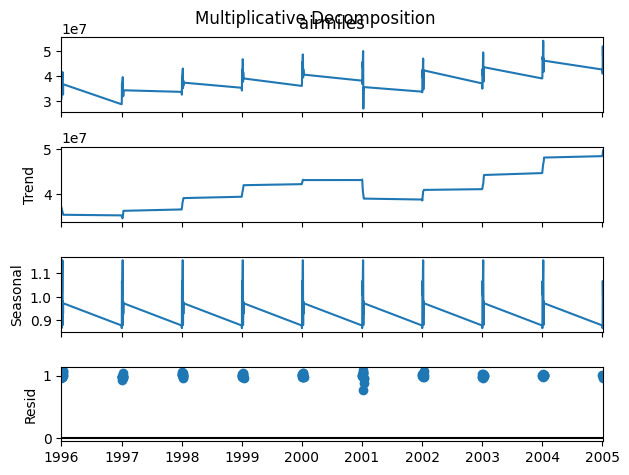

=== Augmented Dickey-Fuller test ===
ADF statistic: -0.9128
p-value: 0.7837
Used lags: 13 nobs: 99
Interpretation: Non-stationary (p > 0.05). Likely needs differencing or transformation.


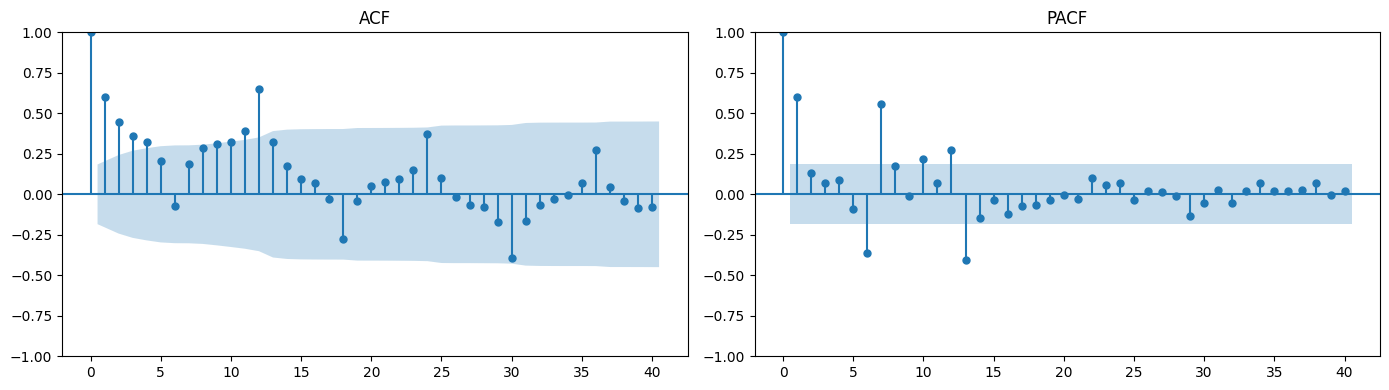

Train length: 101 Test length: 12
Train end: 2004-01-05 00:00:00 Test start: 2004-01-06 00:00:00
pmdarima not available or failed. Falling back to AIC grid search (this can take time).
Selected order by AIC grid: (3, 2, 3) AIC: 3336.990593392418
Fitting ARIMA order: (3, 2, 3)
                               SARIMAX Results                                
Dep. Variable:               airmiles   No. Observations:                  101
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -1661.495
Date:                Sun, 21 Sep 2025   AIC                           3336.991
Time:                        03:25:57   BIC                           3355.156
Sample:                             0   HQIC                          3344.341
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

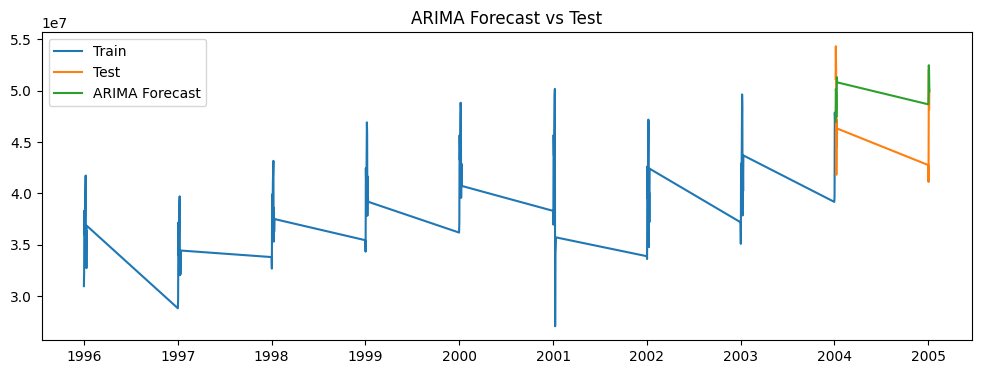


Fitting Holt-Winters additive seasonal model (trend=add, seasonal=add, S=12).
HW Add RMSE: 1248110.4634, MAPE: 0.0207


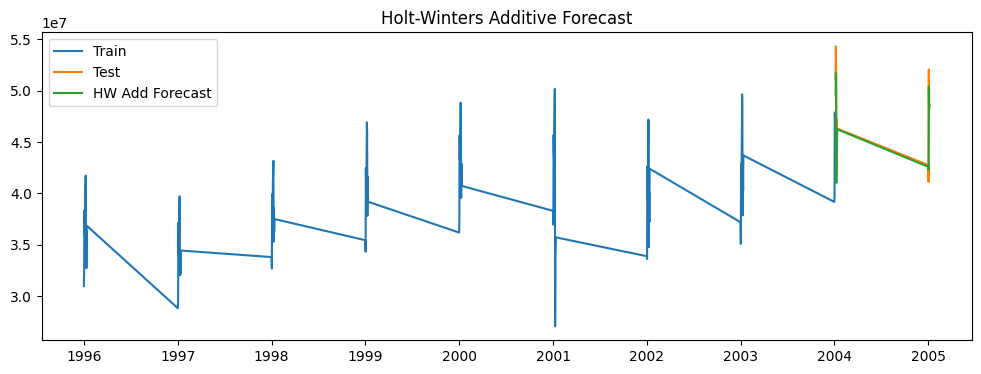


Trying multiplicative seasonality (trend=add, seasonal=mul).
HW Mul RMSE: 1595615.0126, MAPE: 0.0315
Trying no trend + multiplicative seasonality.
HW none+mul RMSE: 2236500.7016, MAPE: 0.0438

Best ES candidate by RMSE: hw_add RMSE: 1248110.4633702515 MAPE: 0.020746634751805274


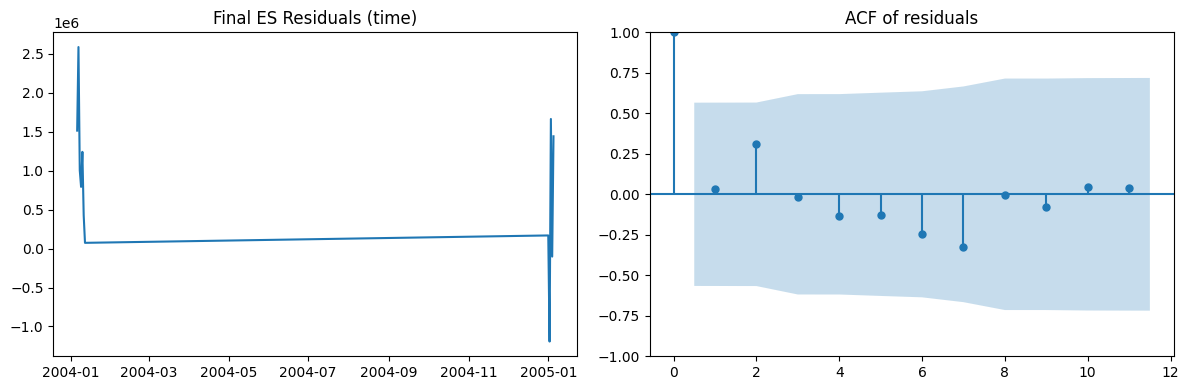

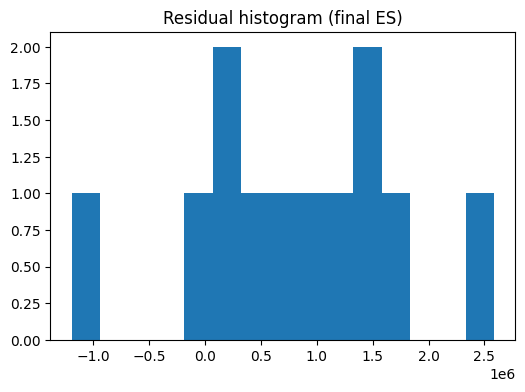

Residual mean: 802674.9070, std: 998267.2565

Final forecast for next 12 months (from index 2005-01-05 00:00:00).
101    4.961835e+07
102    5.172830e+07
103    5.138778e+07
104    4.102340e+07
105    4.596260e+07
106    4.412466e+07
107    4.624208e+07
108    4.259123e+07
109    4.231418e+07
110    5.038776e+07
111    4.825463e+07
112    4.860502e+07
dtype: float64


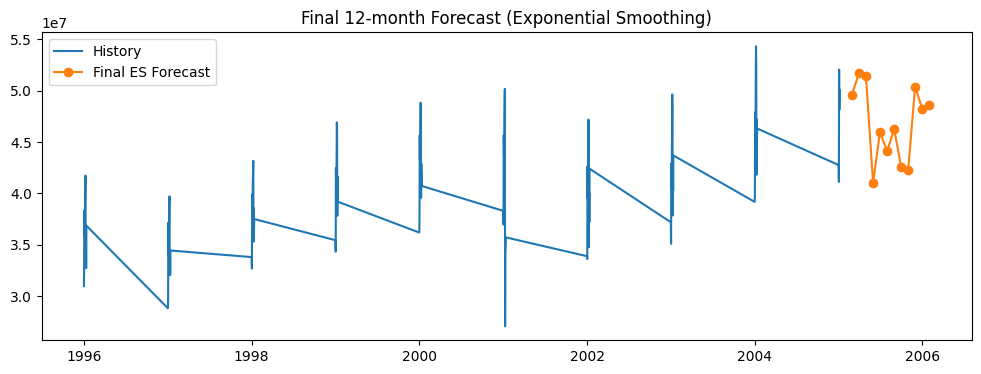


--- Model comparison on TEST ---
ARIMA RMSE: 4700097.3967 MAPE: 0.0879
HW Add RMSE: 1248110.4634 MAPE: 0.0207
HW Mul RMSE: 1595615.0126 MAPE: 0.0315
HW none+mul RMSE: 2236500.7016 MAPE: 0.0438


In [6]:
# Air Miles — Single-cell solution template
# This cell answers Section B + C (June 2025 paper) in one runnable block.
# It prints diagnostics, fits ARIMA & Exponential Smoothing models,
# compares metrics and produces the final 12-month forecast.
#
# Mapping to marks (explicit):
# Section B:
#  a) read/shape/types/ts/missing/plots = 10
#  b) decomposition + ADF (stationarity) + ACF/PACF interpretation = 15
#  c) split last-12 test + ARIMA fit + RMSE/MAPE on test = 15
# Section C:
#  a) Exponential smoothing fit + residuals + RMSE/MAPE = 15
#  b) Improve ES (try alt. seasonal/trend) + final residual analysis = 15
#  c) Forecast next 12 months using final model = 10
#
# NOTE: Run this cell; then paste the printed ADF p-value and a one-line ACF/PACF observation here.

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---------- (a) Read dataset, types, convert to TS, check defects, visualize (10 marks) ----------
# Try common filenames / date columns. Adjust filename if needed.
fname = "airmiles.csv"

# Load CSV robustly
df = pd.read_csv(fname)

# Show basic shape and dtypes (2 marks)
print("Rows,Cols:", df.shape)
print("Columns and dtypes:\n", df.dtypes)

# Try to detect the date column and parse
date_col = None
for c in df.columns:
    if 'date' in c.lower() or 'month' in c.lower() or 'ds' in c.lower():
        date_col = c
        break

# If not found, assume first col is date or create monthly index if no date present
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
    df = df.set_index(date_col).sort_index()
else:
    # if first column is not numeric, try parsing it
    first_col = df.columns[0]
    try:
        maybe_dates = pd.to_datetime(df[first_col], infer_datetime_format=True, errors='coerce')
        if maybe_dates.notna().sum() > 0:
            df[first_col] = maybe_dates
            df = df.set_index(first_col).sort_index()
            date_col = first_col
    except:
        date_col = None

# If still no index, try to construct monthly index assuming Jan 1996 - Sep 2005 (113 records)
if df.index.dtype == 'O' or not np.issubdtype(df.index.dtype, np.datetime64):
    try:
        df.index = pd.date_range(start='1996-01-01', periods=len(df), freq='M')
        print("Constructed monthly index starting 1996-01-01 (assumed).")
    except Exception as e:
        raise RuntimeError("Couldn't parse or construct datetime index automatically. Please check CSV.")

# Ensure the series column (the numeric) — guess the non-datetime column
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) == 0:
    raise RuntimeError("No numeric columns found. Ensure the dataset has a numeric column for air miles.")
val_col = numeric_cols[0]
print("Using value column:", val_col)

# Print head and missing values (2 marks)
print("Head:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# If there are missing values, simple interpolation as a basic fix (note this step and justify in exam)
if df[val_col].isnull().any():
    print("Interpolating missing values (linear).")
    df[val_col] = df[val_col].interpolate(method='time')

# Basic plot (3 marks)
plt.figure(figsize=(12,4))
plt.plot(df.index, df[val_col], marker='o', linestyle='-')
plt.title("Air Miles - Time Series")
plt.xlabel("Date")
plt.ylabel(val_col)
plt.grid(True)
plt.show()

# ---------- (b) Decompose, ADF, ACF/PACF (15 marks) ----------
# Seasonal decomposition (assume monthly seasonality S=12) (4 marks)
period = 12
# decide additive or multiplicative by visual check of variance vs level; we show both plots but attempt multiplicative if variance increases.
decomp_add = sm.tsa.seasonal_decompose(df[val_col], model='additive', period=period, extrapolate_trend='freq')
decomp_mul = sm.tsa.seasonal_decompose(df[val_col], model='multiplicative', period=period, extrapolate_trend='freq')

print("Plotting additive decomposition (inspect trend/seasonal/resid).")
decomp_add.plot()
plt.suptitle("Additive Decomposition")
plt.show()

print("Plotting multiplicative decomposition (inspect if seasonality scales with level).")
decomp_mul.plot()
plt.suptitle("Multiplicative Decomposition")
plt.show()

# ADF test to check stationarity (3 marks)
print("=== Augmented Dickey-Fuller test ===")
adf_res = adfuller(df[val_col].dropna())
print("ADF statistic: {:.4f}".format(adf_res[0]))
print("p-value: {:.4f}".format(adf_res[1]))
print("Used lags:", adf_res[2], "nobs:", adf_res[3])
# Save ADF p-value for the next step
adf_pvalue = adf_res[1]

if adf_pvalue > 0.05:
    print("Interpretation: Non-stationary (p > 0.05). Likely needs differencing or transformation.")
else:
    print("Interpretation: Stationary (p <= 0.05). No differencing necessary.")

# ACF and PACF plots (3+3 marks)
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plot_acf(df[val_col].dropna(), lags=40, ax=plt.gca())
plt.title("ACF")

plt.subplot(1,2,2)
plot_pacf(df[val_col].dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF")
plt.tight_layout()
plt.show()

# ---------- (c) Split into train/test (last 12 months test) (5 marks) ----------
test_horizon = 12
train = df[val_col][:-test_horizon]
test = df[val_col][-test_horizon:]
print("Train length:", len(train), "Test length:", len(test))
print("Train end:", train.index[-1], "Test start:", test.index[0])

# ---------- ARIMA model fit and test metrics (choose orders using auto_arima or AIC grid) (15 marks) ----------
# We'll try to use pmdarima's auto_arima if available, otherwise do a small grid search for (p,d,q)
try:
    import pmdarima as pm
    print("Using pmdarima.auto_arima to select orders (if pmdarima installed).")
    arima_auto = pm.auto_arima(train, seasonal=False, m=1, trace=True,
                               error_action='ignore', suppress_warnings=True,
                               stepwise=True, max_p=4, max_q=4, max_d=2)
    print("Auto ARIMA order:", arima_auto.order)
    order = arima_auto.order
except Exception as e:
    print("pmdarima not available or failed. Falling back to AIC grid search (this can take time).")
    best_aic = np.inf
    best_order = None
    # small grid for exam-time feasibility
    for p in range(0,4):
        for d in range(0,3):
            for q in range(0,4):
                try:
                    model_try = ARIMA(train, order=(p,d,q)).fit()
                    if model_try.aic < best_aic:
                        best_aic = model_try.aic
                        best_order = (p,d,q)
                except:
                    continue
    order = best_order
    print("Selected order by AIC grid:", order, "AIC:", best_aic)

# If series non-stationary but auto selected d=0, consider differencing manually — but trust auto_arima / grid
print("Fitting ARIMA order:", order)
arima = ARIMA(train, order=order)
arima_res = arima.fit()
print(arima_res.summary())

# Forecast and evaluate on test set
arima_forecast = arima_res.forecast(steps=test_horizon)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = mean_absolute_percentage_error(test, arima_forecast)
print("ARIMA Test RMSE: {:.4f}".format(rmse_arima))
print("ARIMA Test MAPE: {:.4f}".format(mape_arima))

plt.figure(figsize=(12,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title("ARIMA Forecast vs Test")
plt.legend()
plt.show()

# ========== Section C: Exponential Smoothing (Holt-Winters) ==========

# (a) Fit simple Holt-Winters (additive) — baseline (15 marks)
print("\nFitting Holt-Winters additive seasonal model (trend=add, seasonal=add, S=12).")
hw_add = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=period).fit()
hw_add_forecast = hw_add.forecast(test_horizon)
rmse_hw_add = np.sqrt(mean_squared_error(test, hw_add_forecast))
mape_hw_add = mean_absolute_percentage_error(test, hw_add_forecast)
print("HW Add RMSE: {:.4f}, MAPE: {:.4f}".format(rmse_hw_add, mape_hw_add))

# Residuals - Ensure index alignment
res_hw_add = test - hw_add_forecast.set_axis(test.index)

# Plot
plt.figure(figsize=(12,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, hw_add_forecast, label='HW Add Forecast')
plt.title("Holt-Winters Additive Forecast")
plt.legend()
plt.show()

# (b) Improve ES: try multiplicative seasonality and vary trend types (10 marks for improvement + 5 marks residual analysis)
print("\nTrying multiplicative seasonality (trend=add, seasonal=mul).")
hw_mul = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=period).fit()
hw_mul_forecast = hw_mul.forecast(test_horizon)
rmse_hw_mul = np.sqrt(mean_squared_error(test, hw_mul_forecast))
mape_hw_mul = mean_absolute_percentage_error(test, hw_mul_forecast)
print("HW Mul RMSE: {:.4f}, MAPE: {:.4f}".format(rmse_hw_mul, mape_hw_mul))

# Also try trend=None with multiplicative seasonality in case series is purely seasonal with level changes
print("Trying no trend + multiplicative seasonality.")
hw_none_mul = ExponentialSmoothing(train, trend=None, seasonal='mul', seasonal_periods=period).fit()
hw_none_mul_forecast = hw_none_mul.forecast(test_horizon)
rmse_hw_none_mul = np.sqrt(mean_squared_error(test, hw_none_mul_forecast))
mape_hw_none_mul = mean_absolute_percentage_error(test, hw_none_mul_forecast)
print("HW none+mul RMSE: {:.4f}, MAPE: {:.4f}".format(rmse_hw_none_mul, mape_hw_none_mul))

# Choose final ES model based on lowest RMSE (or MAPE) on test
es_candidates = {
    'hw_add': (rmse_hw_add, mape_hw_add, hw_add, hw_add_forecast, res_hw_add),
    'hw_mul': (rmse_hw_mul, mape_hw_mul, hw_mul, hw_mul_forecast, test - hw_mul_forecast.set_axis(test.index)),
    'hw_none_mul': (rmse_hw_none_mul, mape_hw_none_mul, hw_none_mul, hw_none_mul_forecast, test - hw_none_mul_forecast.set_axis(test.index))
}
best_es = min(es_candidates.items(), key=lambda x: x[1][0])  # by RMSE
print("\nBest ES candidate by RMSE:", best_es[0], "RMSE:", best_es[1][0], "MAPE:", best_es[1][1])

# Residual diagnostics for chosen model (5 marks)
final_es_model = best_es[1][2]
final_es_forecast = best_es[1][3]
final_residuals = best_es[1][4]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(final_residuals)
plt.title("Final ES Residuals (time)")

plt.subplot(1,2,2)
# Set lags to be less than the number of observations in residuals
lags_for_residuals = min(30, len(final_residuals.dropna()) - 1) if len(final_residuals.dropna()) > 1 else 1
if lags_for_residuals < 1: lags_for_residuals = 1 # Ensure at least 1 lag if possible
sm.graphics.tsa.plot_acf(final_residuals.dropna(), lags=lags_for_residuals, ax=plt.gca())
plt.title("ACF of residuals")
plt.tight_layout()
plt.show()

# Histogram + summary
plt.figure(figsize=(6,4))
plt.hist(final_residuals.dropna(), bins=15)
plt.title("Residual histogram (final ES)")
plt.show()
print("Residual mean: {:.4f}, std: {:.4f}".format(final_residuals.mean(), final_residuals.std()))

# ---------- (c) Forecast next 12 months using final model (10 marks) ----------
horizon = 12
print("\nFinal forecast for next {} months (from index {}).".format(horizon, df.index[-1]))
final_forecast = final_es_model.forecast(horizon)
print(final_forecast)

# Plot forecasts appended to full history for context
plt.figure(figsize=(12,4))
plt.plot(df.index, df[val_col], label='History')
future_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M')
plt.plot(future_index, final_forecast, marker='o', label='Final ES Forecast')
plt.legend()
plt.title("Final 12-month Forecast (Exponential Smoothing)")
plt.show()

# Summarize model comparisons
print("\n--- Model comparison on TEST ---")
print("ARIMA RMSE: {:.4f} MAPE: {:.4f}".format(rmse_arima, mape_arima))
print("HW Add RMSE: {:.4f} MAPE: {:.4f}".format(rmse_hw_add, mape_hw_add))
print("HW Mul RMSE: {:.4f} MAPE: {:.4f}".format(rmse_hw_mul, mape_hw_mul))
print("HW none+mul RMSE: {:.4f} MAPE: {:.4f}".format(rmse_hw_none_mul, mape_hw_none_mul))

# End of cell: please tell me the ADF p-value printed above and a one-line ACF/PACF behaviour

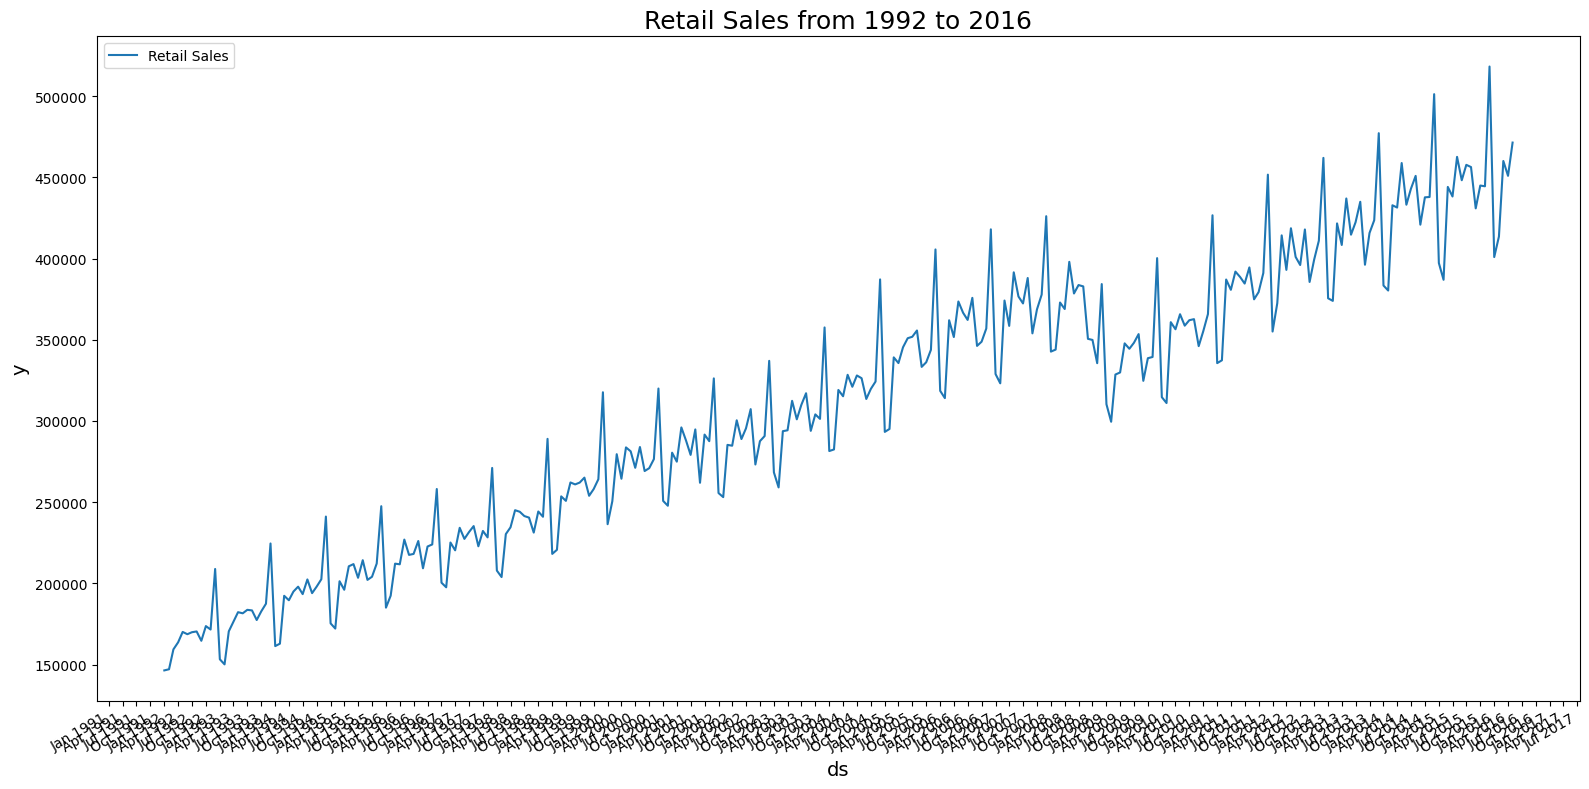

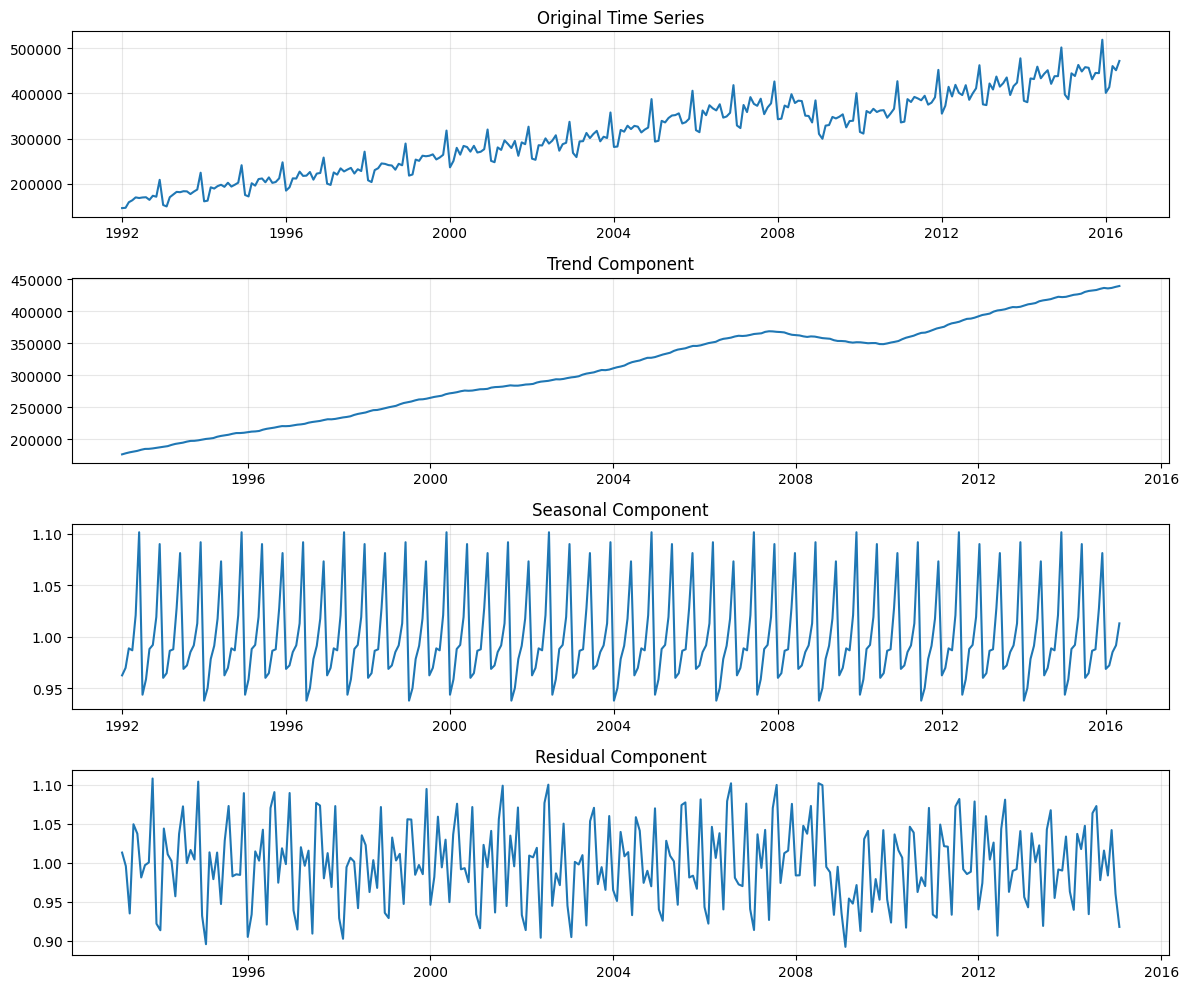

ADF Statistics : -0.6443 
p-value : 0.8606 

After First Difference:
ADF Statistics : -3.4379 
p-value : 0.0097 


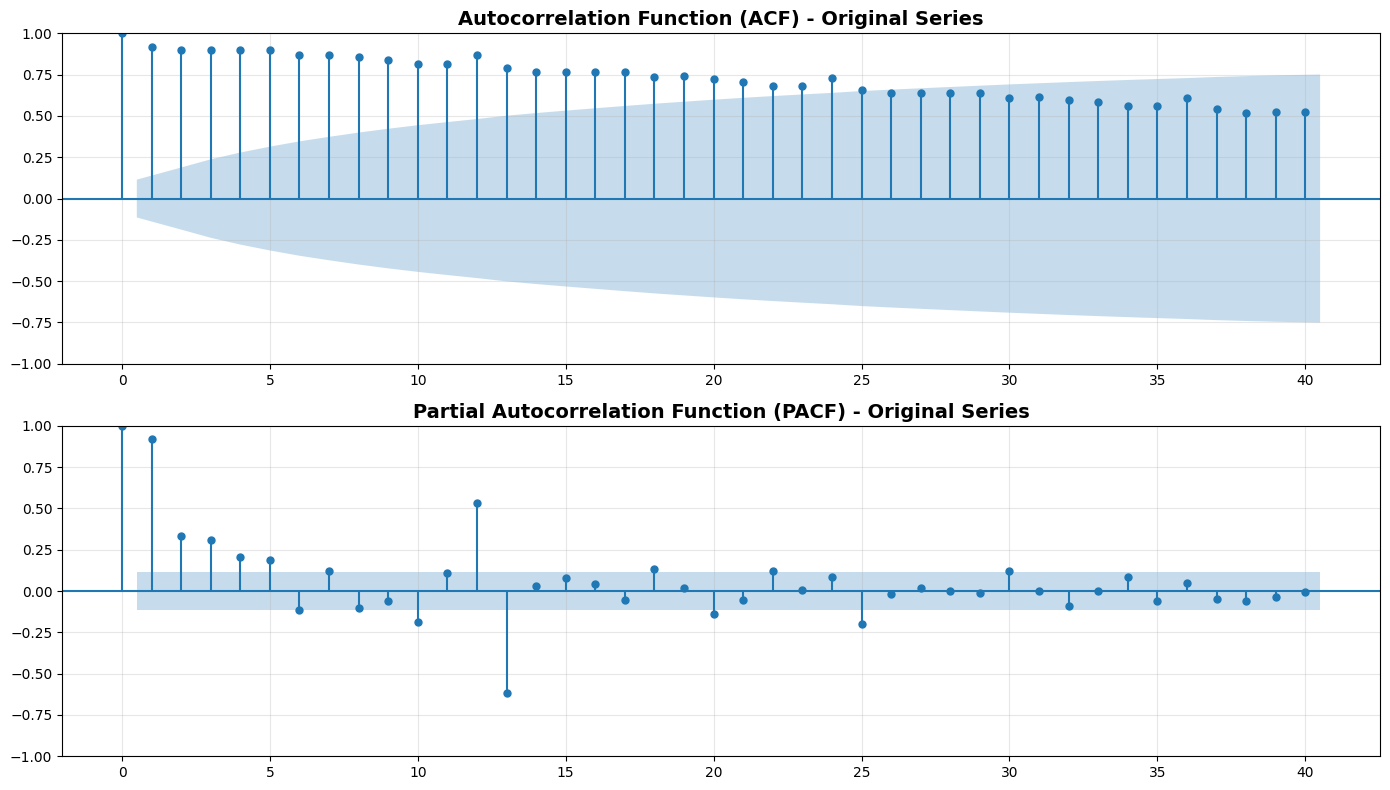

ARIMA (2,1,2)
Test RMSE: 53254.91
Test MAPE: 9.86%


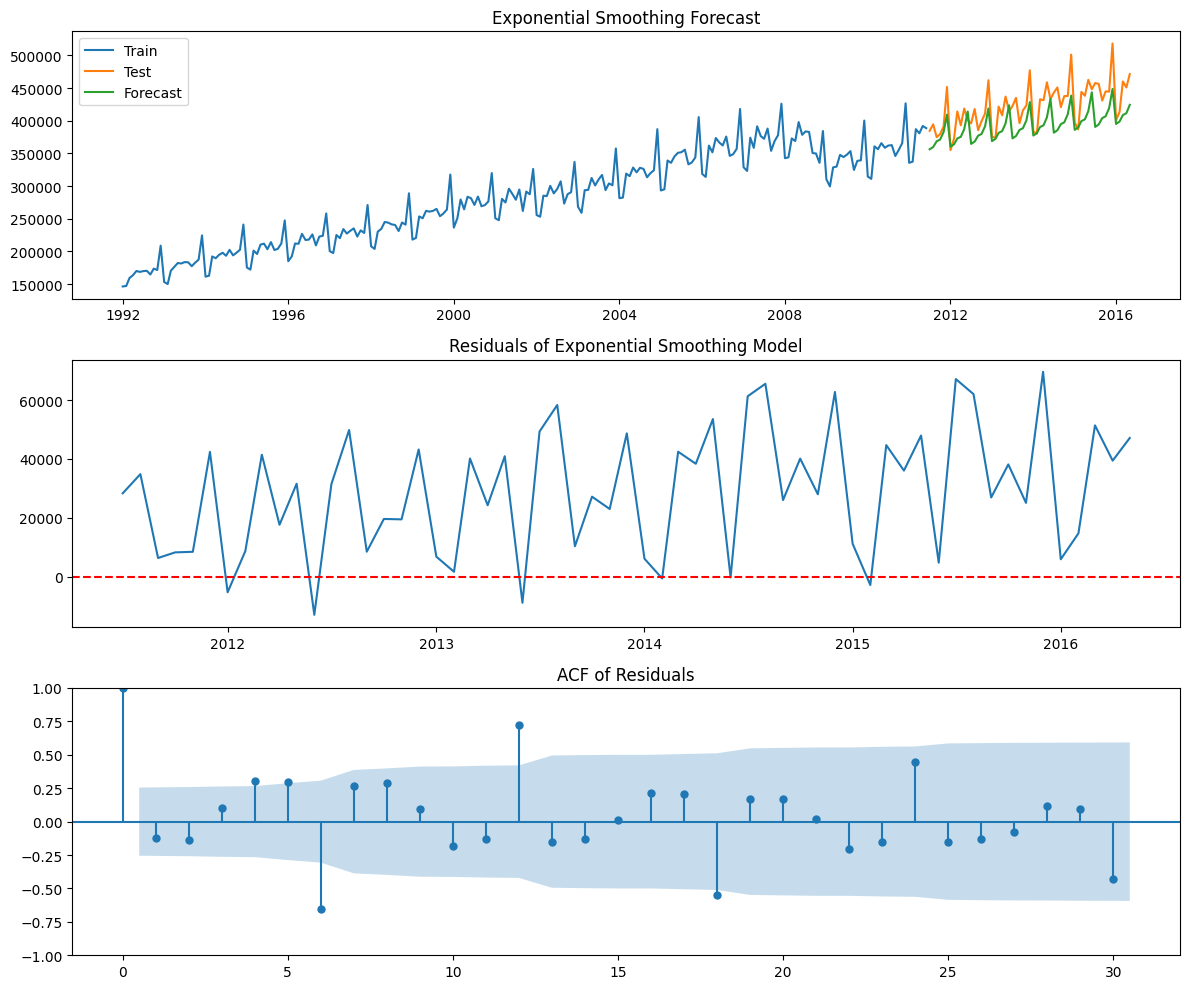

RMSE: 36048.12
MAPE: 6.88%
Best RMSE :  27673.79102607785
Best Config :  {'trend': None, 'seasonal': None, 'seasonal_periods': 6, 'cv_rmse': np.float64(27673.79102607785)}
RMSE: 57955.62
MAPE: 10.91%


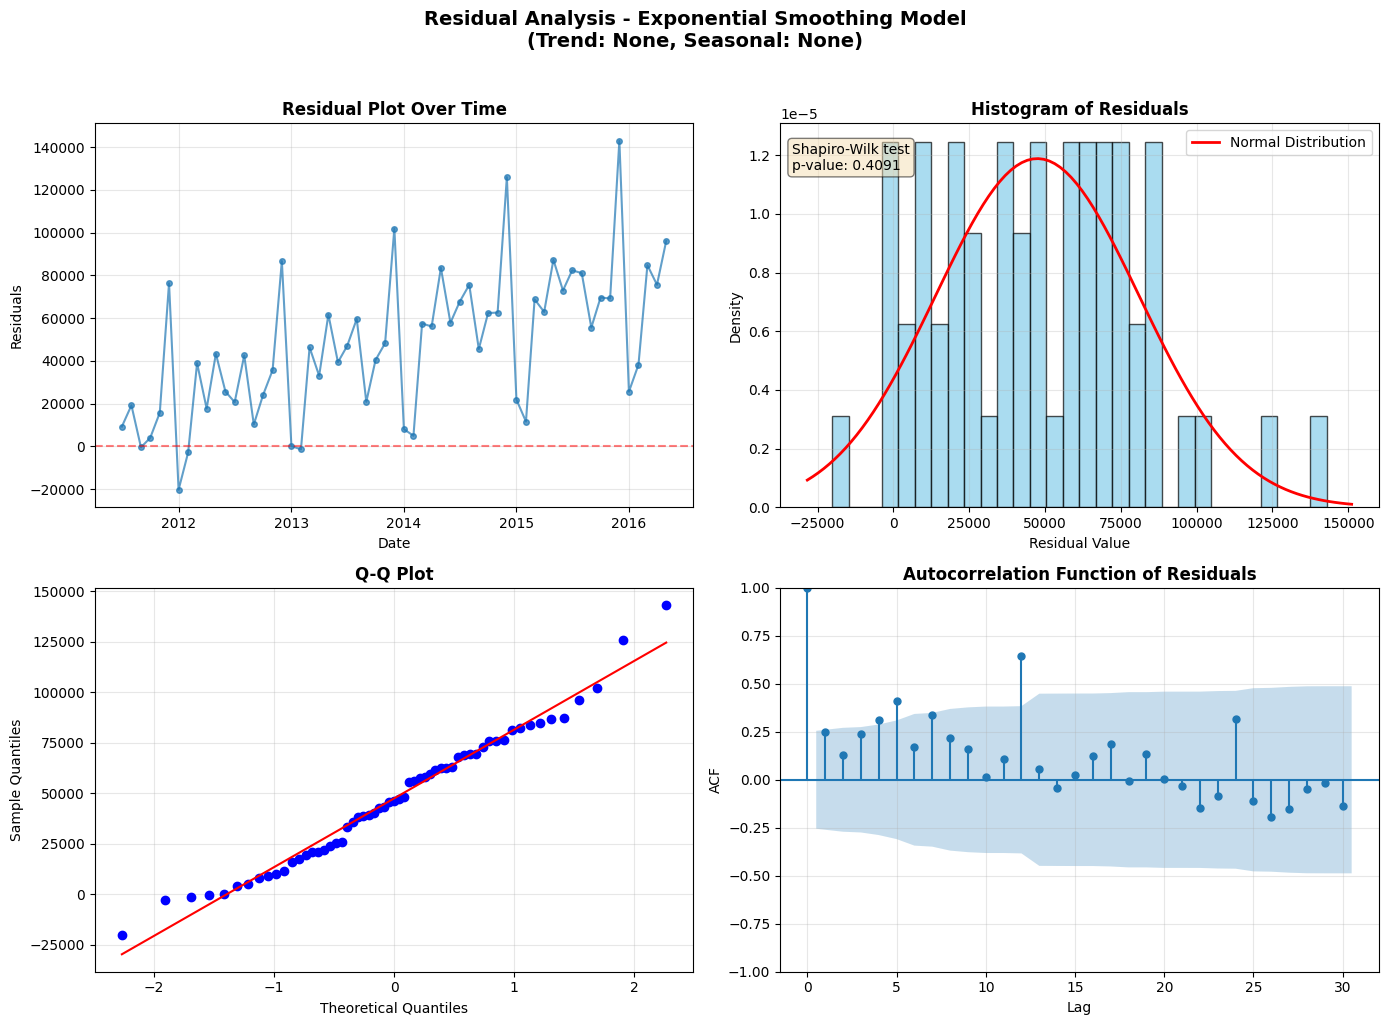

,y,type
ds,,
2015-12-01,518253.00000,Actual
2016-01-01,400928.00000,Actual
2016-02-01,413554.00000,Actual
2016-03-01,460093.00000,Actual
2016-04-01,450935.00000,Actual
2016-05-01,471421.00000,Actual
2016-06-01,375305.15788,Forecast
2016-07-01,375305.15788,Forecast
2016-08-01,375305.15788,Forecast


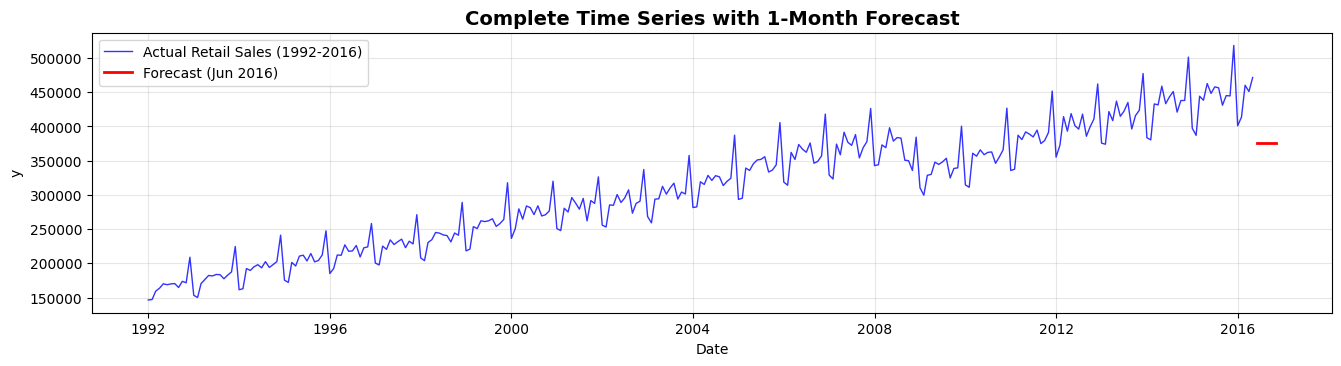

In [7]:
raw_retail_data = pd.read_csv("retail_sales.csv")
raw_retail_data.head()

# What are the number of rows and no. of cols
raw_retail_data.shape


# Types of variables
raw_retail_data.dtypes

# b. convert the data into time series

raw_retail_data['ds'] = pd.to_datetime(raw_retail_data['ds'], format = '%Y-%m-%d')
raw_retail_data.set_index('ds', inplace=True)
raw_retail_data.head()

raw_retail_data.tail()

raw_retail_data.isna().sum()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(raw_retail_data.index, raw_retail_data['y'], label='Retail Sales')
plt.title('Retail Sales from 1992 to 2016', fontsize=18)
plt.xlabel('ds', fontsize=14)
plt.ylabel('y', fontsize=14)

# Format the date on the x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series , This is seems multiplicative model
result = seasonal_decompose(raw_retail_data['y'], model='multiplicative', period=30)

# Plot the components
plt.figure(figsize=(12, 10))

# Original series
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Original Time Series')
plt.grid(True, alpha=0.3)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')
plt.grid(True, alpha=0.3)

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.grid(True, alpha=0.3)

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Augumented dicky fuller test to check the stationarity
clean_data = raw_retail_data['y'].replace([np.inf, -np.inf], np.nan).dropna()
ad_fuller_result = adfuller(clean_data)
print (f'ADF Statistics : {ad_fuller_result[0]:.4f} ')
print (f'p-value : {ad_fuller_result[1]:.4f} ')


# Performing First order differenceing
diff_data = raw_retail_data['y'].diff().dropna()
clean_data_diff = diff_data.replace([np.inf, -np.inf], np.nan).dropna()

# Test stationarity after first difference
print("\nAfter First Difference:")
ad_fuller_result_diff = adfuller(clean_data_diff)
print (f'ADF Statistics : {ad_fuller_result_diff[0]:.4f} ')
print (f'p-value : {ad_fuller_result_diff[1]:.4f} ')


#Plot ACF and PACF for original series
plt.figure(figsize=(14, 8))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(raw_retail_data['y'], lags=40, ax=plt.gca(), alpha=0.05)
plt.title('Autocorrelation Function (ACF) - Original Series', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(raw_retail_data['y'], lags=40, ax=plt.gca(), alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) - Original Series', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


train_data = raw_retail_data[:234]
test_data = raw_retail_data[234:]
train_data.shape , test_data.shape

train_data.tail()

test_data.head()

# Input
d=1
p_values = range(0, 3)
q_values = range(0, 3)


# Run the ARIMA model with grid
results = []
for p in p_values:
    for q in q_values:
        try:
            # Fit model
            model = ARIMA(train_data['y'], order=(p, d, q))
            fitted_model = model.fit()

            # Get AIC
            aic = fitted_model.aic
            results.append([f'({p},{d},{q})', aic])

        except:
            continue

results_df = pd.DataFrame(results)
results_df.columns = ['(p,d,q)' , 'AIC']

results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
results_df




from sklearn.metrics import  mean_absolute_percentage_error

# So the best model values of p,d, q is (2,1,2)
p = 2
d = 1
q = 2
model = ARIMA(train_data['y'], order=(p, d, q))
fitted_model = model.fit()
predictions = fitted_model.forecast(steps=len(test_data['y']))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], predictions))

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data['y'], predictions) * 100

print(f"ARIMA ({p},{d},{q})")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAPE: {mape:.2f}%")





#Section C


seasonal_period=6

# Fit exponential smoothing model
model = ExponentialSmoothing(train_data['y'],
                            trend='mul',
                            seasonal='mul',
                            seasonal_periods=seasonal_period).fit()

# Make forecasts for test period
forecast = model.forecast(len(test_data))

# Calculate residuals for test data
residuals = test_data['y'] - forecast

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast))
mape = mean_absolute_percentage_error(test_data['y'], forecast) * 100

# Plot results
plt.figure(figsize=(12, 10))

# Original data and forecast
plt.subplot(3, 1, 1)
plt.plot(train_data.index, train_data['y'], label='Train')
plt.plot(test_data.index, test_data['y'], label='Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.legend()

# Residuals
plt.subplot(3, 1, 2)
plt.plot(test_data.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Exponential Smoothing Model')

# ACF of residuals
plt.subplot(3, 1, 3)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Print metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Use the last 29 training data for validation (cross-validation)
cv_size = 29
cv_train = train_data.iloc[:-cv_size]
cv_val = train_data.iloc[-cv_size:]

cv_train.shape , cv_val.shape

best_config = None
best_avg_rmse = float('inf')
seasonal_period = 6

for trend in ['add', 'mul', None]:
        for seasonal in ['add', 'mul', None]:
            # Skip invalid combinations
            if seasonal and not trend:
                continue

            try:
                # Fit model on cv training portion
                model = ExponentialSmoothing(cv_train['y'],
                                           trend=trend,
                                           seasonal=seasonal,
                                           seasonal_periods=seasonal_period).fit()

                # Forecast validation period
                forecast = model.forecast(len(cv_val))

                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(cv_val['y'], forecast))

                # Update best configuration
                if rmse < best_avg_rmse:
                    best_avg_rmse = rmse
                    best_config = {
                        'trend': trend,
                        'seasonal': seasonal,
                        'seasonal_periods': seasonal_period,
                        'cv_rmse': rmse
                    }

            except Exception as e:
                print(e)
                continue



print("Best RMSE : ", best_avg_rmse)
print("Best Config : ", best_config)

# Final Model with best config
final_model = ExponentialSmoothing(train_data['y'],
                                  trend=best_config['trend'],
                                  seasonal=best_config['seasonal'],
                                  seasonal_periods=best_config['seasonal_periods']).fit()

# Make forecasts for test period
final_forecast = final_model.forecast(len(test_data))

# Calculate residuals and metrics for test data
final_rmse = np.sqrt(mean_squared_error(test_data['y'], final_forecast))
final_mape = mean_absolute_percentage_error(test_data['y'], final_forecast) * 100

print(f"RMSE: {final_rmse:.2f}")
print(f"MAPE: {final_mape:.2f}%")



# Get predictions and residuals
predictions = final_model.forecast(steps=len(test_data))
residuals = test_data['y'] - predictions



from scipy import stats

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals over time
ax1.plot(test_data.index, residuals, 'o-', alpha=0.7, markersize=4)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax1.set_title('Residual Plot Over Time', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Residuals')
ax1.grid(True, alpha=0.3)


# Plot 2: Histogram of residuals with normal curve
ax2.hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
# Overlay normal distribution
mu, std = residuals.mean(), residuals.std()
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax2.plot(x, p, 'r-', linewidth=2, label='Normal Distribution')

ax2.set_title('Histogram of Residuals', fontsize=12, fontweight='bold')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)
# Add text with normality test
stat, p_value = stats.shapiro(residuals)
ax2.text(0.02, 0.95, f'Shapiro-Wilk test\np-value: {p_value:.4f}',
         transform=ax2.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='top')

# Plot 3: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot', fontsize=12, fontweight='bold')
ax3.set_xlabel('Theoretical Quantiles')
ax3.set_ylabel('Sample Quantiles')
ax3.grid(True, alpha=0.3)

# Plot 4: ACF of residuals
plot_acf(residuals, lags=30, ax=ax4, alpha=0.05)
ax4.set_title('Autocorrelation Function of Residuals', fontsize=12, fontweight='bold')
ax4.set_xlabel('Lag')
ax4.set_ylabel('ACF')
ax4.grid(True, alpha=0.3)

plt.suptitle(f'Residual Analysis - Exponential Smoothing Model\n(Trend: {best_config["trend"]}, Seasonal: {best_config["seasonal"]})',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



# Forecast next 6 months, The original question is for 1 month
forecast = final_model.forecast(steps=6)

# Create date range for forecast period
last_date = raw_retail_data.index[-1]
next_months = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='MS')

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'ds': next_months,
    'y': forecast.values,
    'type': 'Forecast'
})
forecast_df.set_index('ds', inplace=True)

# Add type column to original data
original_df = raw_retail_data.copy()
original_df['type'] = 'Actual'

# Combine original and forecast data
combined_df = pd.concat([original_df, forecast_df])

# Create visualization
plt.figure(figsize=(16, 8))

# Plot full time series
plt.subplot(2, 1, 1)
# Plot actual data
actual_data = combined_df[combined_df['type'] == 'Actual']
plt.plot(actual_data.index, actual_data['y'],
         color='blue', label='Actual Retail Sales (1992-2016)', linewidth=1, alpha=0.8)

# Plot forecast
forecast_data = combined_df[combined_df['type'] == 'Forecast']
plt.plot(forecast_data.index, forecast_data['y'],
         color='red', label='Forecast (Jun 2016)', linewidth=2, linestyle='-')


plt.title('Complete Time Series with 1-Month Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)



combined_df.tail(12)

1. What are the main components of a time series?
A time series is a sequence of data points collected over time. It can be decomposed into four
main components that describe its underlying patterns.
Definition and Explanation
1. Trend (Tt): The trend is the long-term direction or movement of the data. It shows a
general increase, decrease, or stagnation over an extended period. For example, the
consistent increase in a country's GDP over several decades is a trend. A trend can be
linear or non-linear.
2. Seasonality (St): Seasonality refers to regular and predictable patterns that repeat
over a fixed period, such as a day, week, or year. These fluctuations are often caused
by factors like weather, holidays, or business cycles. For instance, ice cream sales are
typically higher in the summer and lower in the winter every year.
3. Cyclical Component (Ct): Cyclical components are fluctuations that occur at
irregular and non-fixed intervals. These cycles are usually longer than a seasonal
period and are often related to broader economic or business conditions, like periods
of expansion and recession. Unlike seasonality, the duration and magnitude of cycles
are not constant.
4. Irregular Component (It or ϵt): Also known as the residual or random noise, this
component represents the unpredictable and random fluctuations in the data that
cannot be explained by the other three components. It is what's left over after
accounting for trend, seasonality, and cycles. Examples include the effects of a
sudden natural disaster or a political event on stock prices.
How Components Affect Analysis
Understanding these components is crucial for analysis and forecasting:
 Modeling: By identifying and isolating these components, we can build more
accurate models. For example, a model might have separate terms for trend and
seasonality.
 Forecasting: Extrapolating the trend and seasonal patterns is the basis for forecasting
future values.
 Noise Reduction: Decomposing the series helps in separating the signal (trend,
seasonality) from the noise (irregular component), leading to a better understanding of
the underlying process.
Identifying and Removing Components
 Identification:
o Visualization: Plotting the time series data is the first step. A clear upward or
downward slope indicates a trend. Repeating patterns at fixed intervals (e.g.,
peaks every 12 months) indicate seasonality.
o Decomposition Plots: A seasonal decomposition plot explicitly separates and
visualizes the trend, seasonal, and residual components.
o Autocorrelation (ACF) Plots: A significant spike at a specific lag (e.g., lag
12 for monthly data) in an ACF plot is a strong indicator of seasonality.
 Removal (Detrending/Deseasonalizing):
o Differencing: Subtracting a previous observation from the current one (yt′=yt
−yt−1) can help remove a trend. For seasonality, you can take a seasonal
difference (e.g., yt′=yt−yt−12 for monthly data).
o Moving Averages: Smoothing the data with a moving average can help
visualize or remove the trend.
o Model Fitting: Fitting a regression model to the trend and then subtracting it
from the series can detrend the data.
2. What is the difference between additive and multiplicative time series
models?
Additive and multiplicative models are two ways to describe how the four components of a
time series combine.
Definition and Explanation
1. Additive Model: An additive model assumes that the components of the time series
are added together. It is used when the magnitude of the seasonal and irregular
variations is constant over time and does not depend on the level of the time series.
o Formula: Yt=Tt+St+Ct+It
o When to use: Choose an additive model when the seasonal fluctuations are
roughly the same size regardless of the trend.
o Example: Monthly sales of a product that increase by about 1,000 units every
December, regardless of whether the baseline sales are 10,000 or 50,000 units.
2. Multiplicative Model: A multiplicative model assumes that the components are
multiplied together. It is used when the magnitude of the seasonal and irregular
variations changes in proportion to the level of the time series.
o Formula: Yt=Tt×St×Ct×It
o When to use: Choose a multiplicative model when the seasonal fluctuations
grow larger as the trend increases.
o Example: Airline passenger numbers that show a 10% increase every
summer. If the trend-level is 1 million passengers, the increase is 100,000. If
the trend grows to 2 million, the increase becomes 200,000. The variation is
proportional to the trend.
When to Use Log Transformation
A log transformation is often used to convert a multiplicative model into an additive one. If a
time series exhibits a multiplicative relationship, its variance tends to increase as its level
increases. Taking the logarithm of the series can stabilize this variance.
 Why it works: The logarithm rule log(A×B)=log(A)+log(B) converts multiplication
to addition.
o Applying a log to the multiplicative model gives: log(Yt)=log(Tt×St×Ct×It)
log(Yt)=log(Tt)+log(St)+log(Ct)+log(It)
 Scenario: You should use a log transformation when you observe that the amplitude
of the seasonal or cyclical patterns increases with the trend. This is a common
characteristic of financial and economic data.
3. What is stationarity and why is it important?
Definition
A time series is said to be stationary if its statistical properties—specifically the mean,
variance, and autocovariance—are all constant over time. In simpler terms, a stationary
series does not have a trend or predictable seasonal patterns. Its overall behavior is consistent,
and it tends to revert to a constant long-term mean.
Why is it Important?
Most time series models, including ARIMA models, are built on the assumption that the data
is stationary.
1. Predictability: In a non-stationary series, the properties (mean, variance) are a
function of time, making it difficult to predict. A stationary series is easier to model
because its future statistical properties are expected to be the same as its past
properties.
2. Model Stability: Models trained on non-stationary data may produce unreliable and
spurious results. For example, you might find a high correlation between two
variables that are both trending upwards simply due to the trend, not because they are
genuinely related.
3. Mathematical Foundation: The mathematical theories behind many common
forecasting models depend on the stationarity assumption.
Achieving Stationarity with Differencing
Differencing is the most common technique to make a non-stationary series stationary. It
involves computing the difference between consecutive observations.
 Process:
o First-Order Differencing: To remove a linear trend, you calculate a new
series where each point is the difference between the current and previous
value.
yt′=yt−yt−1
o Seasonal Differencing: To remove seasonality, you subtract the value from
the previous season. For monthly data with a yearly season, this would be:
yt′=yt−yt−12
 How it helps: By subtracting the previous value, you remove the long-term trend,
leaving behind a series that fluctuates around a constant mean of zero. If one round of
differencing isn't enough, it can be applied again (second-order differencing).
4. How are ACF and PACF used to identify the order of an ARIMA model?
The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are
essential tools for identifying the parameters of an ARIMA model.
Definitions
 Autocorrelation Function (ACF): The ACF measures the correlation between a time
series and its lagged versions. For example, the ACF at lag k is the correlation
between yt and yt−k. It captures both the direct and indirect correlations.
 Partial Autocorrelation Function (PACF): The PACF measures the direct
correlation between a time series and its lagged version after removing the effects of
the intermediate lags. For example, the PACF at lag k is the correlation between yt
and yt−k that is not explained by lags 1,2,...,k−1.
Identifying ARIMA Model Order
ARIMA models are specified by three parameters: ARIMA(p, d, q).
 p: The order of the Autoregressive (AR) part.
 d: The degree of differencing needed to make the series stationary.
 q: The order of the Moving Average (MA) part.
ACF and PACF plots help us choose the values for p and q after the series has been made
stationary (i.e., after differencing d times).
Model ACF Plot PACF Plot
AR(p) Tails off gradually (geometric decay) or in a sinewave pattern.
Cuts off sharply after
lag p.
MA(q) Cuts off sharply after lag q. Tails off gradually.
ARMA(p,q) Tails off gradually. Tails off gradually.
Export to Sheets
How to Read the Plots:
 "Cuts off sharply": The plot shows one or more significant spikes, and then all
subsequent spikes are non-significant (within the blue confidence bands).
 "Tails off gradually": The correlations decrease slowly as the lags increase.
Example Usage:
1. Make your time series stationary using differencing (d).
2. Plot the ACF and PACF of the stationary series.
3. If the PACF cuts off at lag p and the ACF tails off, it suggests an AR(p) model. So,
q=0.
4. If the ACF cuts off at lag q and the PACF tails off, it suggests an MA(q) model. So,
p=0.
5. If both plots tail off, it suggests a mixed ARMA(p,q) model, and identifying the exact
orders can be more of an art, often requiring trial and error.
5. What is the role of Moving Average in time series analysis?
The term "moving average" can refer to two related but distinct concepts in time series: the
moving average smoothing technique and the Moving Average (MA) model component in
ARIMA.
1. Moving Average for Smoothing
 Definition: Moving average smoothing is a technique used to reduce noise and
highlight the underlying trend in a time series. It works by calculating the average of a
fixed number of consecutive data points (the "window").
 Formula: A simple moving average of order k is:
SMAt=k1i=0∑k−1yt−i
 Role and Purpose:
o Noise Reduction: It smooths out random, short-term fluctuations (the
irregular component).
o Trend Identification: It makes it easier to visualize the long-term trend in the
data.
o Deseasonalizing: A carefully chosen window size (e.g., 12 for monthly data)
can be used to remove seasonal effects.
2. Moving Average (MA) Model
 Definition: A Moving Average (MA) model, denoted as MA(q), is a statistical model
where the current value of the time series (yt) is a linear combination of past forecast
errors (also called random shocks or innovations).
 Formula: An MA(q) model is defined as:
yt=c+ϵt+θ1ϵt−1+θ2ϵt−2+...+θqϵt−q
Where:
o c is a constant.
o ϵt is the white noise error term at time t.
o q is the order of the model (the number of past error terms included).
 Role and Purpose:
o Modeling Shocks: The MA model is excellent for capturing the impact of
unpredictable, short-lived shocks or events. The model assumes that a random
shock at one point in time can affect the series for a few subsequent time
periods before its effect disappears.
o Component of ARIMA: It is the "MA" part of the powerful ARIMA(p,d,q)
forecasting model.
 Determining the Order (q): As explained previously, the order q of an MA process
is identified using the ACF plot. The ACF will have significant spikes up to lag q and
then will cut off sharply, with all subsequent correlations being insignificant.

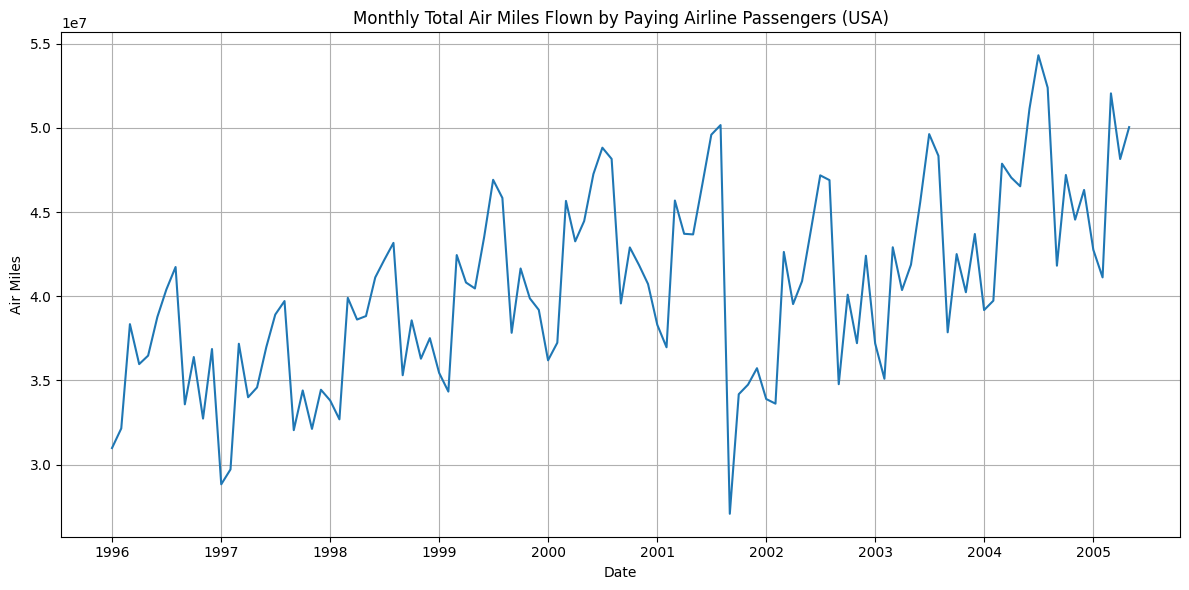

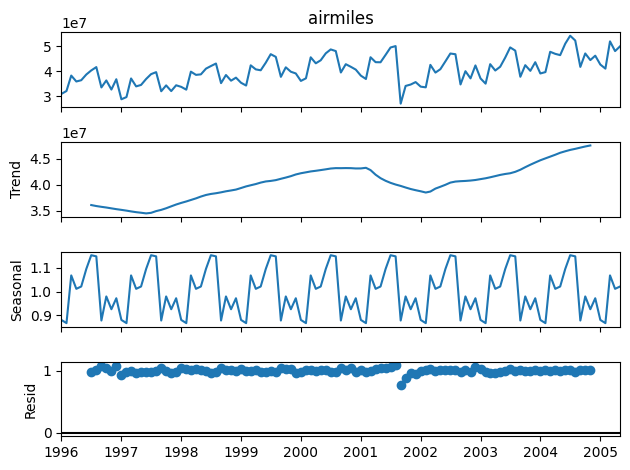

In [8]:
#Mayagain

df = pd.read_csv("airmiles.csv")
df.head()
df.shape  #Number of rows and columns

df.dtypes #Types of variables

#Convert the data into time series
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df.set_index('Date', inplace=True)
df.head()

ts = df['airmiles'].asfreq('MS')
ts

ts.isnull().sum()  #Null value check


#Visualize time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title("Monthly Total Air Miles Flown by Paying Airline Passengers (USA)")
plt.xlabel("Date")
plt.ylabel("Air Miles")
plt.grid(True)
plt.tight_layout()
plt.show()


#Decompose time series and check for components of time series
decomposition = seasonal_decompose(ts, model='multiplicative')
fig = decomposition.plot()
plt.tight_layout()
plt.show()






We used multiplicative decomposition to break the time series into three components:
Trend: Represents the long-term upward movement in air miles over time.
Seasonality: Captures the repetitive monthly travel patterns (e.g., higher miles in summer or holiday seasons).
Residual: Represents random noise or irregular variations after removing trend and seasonality.
Visualization of the decomposition clearly shows:
A strong trend component increasing over time.
Clear seasonal variation repeating every year.
Small and consistent residuals, indicating low irregularity.
Interpretation: The dataset is well-suited for models that account for both trend and seasonality (e.g., ARIMA, Exponential Smoothing).

In [9]:
#Dicky fuller test to check statinarity

adf_result = adfuller(ts)
adf_result_dict = {
 "ADF Statistic": adf_result[0],
 "p-value":adf_result[1],
 "Used Lag": adf_result[2],
 "Number of Observations": adf_result[3],
 "Critical Values": adf_result[4]
}
adf_result_dict


{'ADF Statistic': np.float64(-0.9127581336675443),
 'p-value': np.float64(0.7837419514698822),
 'Used Lag': 13,
 'Number of Observations': 99,
 'Critical Values': {'1%': np.float64(-3.498198082189098),
  '5%': np.float64(-2.891208211860468),
  '10%': np.float64(-2.5825959973472097)}}

Conclusion:
Since the p-value (0.78) > 0.05, we fail to reject the null hypothesis.
Therefore, the time series is non-stationary.
Actions to be taken if Series is Non-Stationary
If the series is non-stationary, the following steps can be taken:
Differencing the time series (first-order differencing) to remove trend.
Log transformation if variance increases over time.
Seasonal differencing if periodic patterns exist.
Recheck stationarity after each step using the ADF test again.

In [10]:
#additional

ts_diff = ts.diff().dropna()
adf_result_diff = adfuller(ts_diff)
adf_result_diff_dict = {
 "ADF Statistic": adf_result_diff[0],
 "p-value": adf_result_diff[1],
 "Used Lag": adf_result_diff[2],
 "Number of Observations": adf_result_diff[3],
 "Critical Values": adf_result_diff[4]
}
adf_result_diff_dict



{'ADF Statistic': np.float64(-2.8470909054832867),
 'p-value': np.float64(0.05185562581965182),
 'Used Lag': 12,
 'Number of Observations': 99,
 'Critical Values': {'1%': np.float64(-3.498198082189098),
  '5%': np.float64(-2.891208211860468),
  '10%': np.float64(-2.5825959973472097)}}

Interpretation:
The p-value = 0.0519, which is very close to the 0.05 threshold.
The ADF Statistic is slightly greater than the 5% critical value.
This means the series is nearly stationary, and most models (like ARIMA) can proceed with this first-order differenced data.
Visual Inspection
The differenced series shows:
Stationary behavior around a constant mean.
No visible trend or changing variance.
If you want to make the stationarity even stronger, you can log transform the original series before differencing:

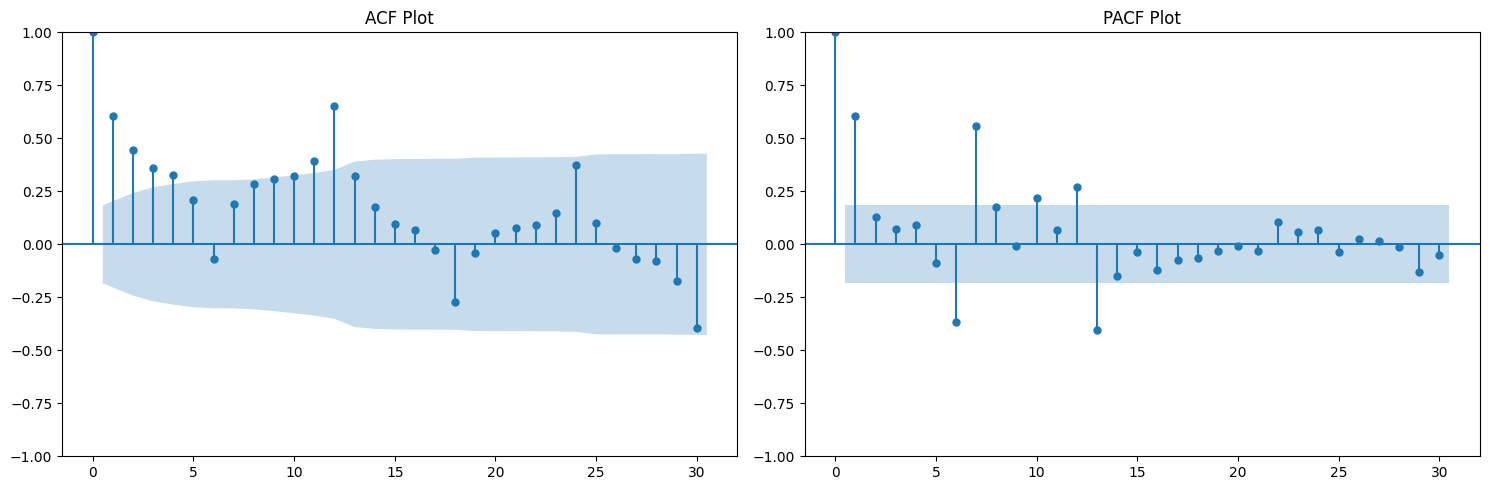

In [11]:
ts_log = np.log(ts)
ts_log_diff = ts_log.diff().dropna()
adf_result_log_diff = adfuller(ts_log_diff)
adf_result_log_diff_dict = {
 "ADF Statistic": adf_result_log_diff[0],
 "p-value": adf_result_log_diff[1],
 "Used Lag": adf_result_log_diff[2],
 "Number of Observations": adf_result_log_diff[3],
 "Critical Values": adf_result_log_diff[4]
}
adf_result_log_diff_dict

#Plot auto corelation and partia auto corelation function
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(ts, lags=30, ax=axes[0])
axes[0].set_title("ACF Plot")
plot_pacf(ts, lags=30, ax=axes[1])
axes[1].set_title("PACF Plot")

plt.tight_layout()
plt.show()





Inference from ACF and PACF Plots:
ACF (Autocorrelation Function)
Observations:
Lag 1 has a very strong spike, close to 1.0 — indicating high autocorrelation.
Gradual decline of autocorrelation values over time — this is called slow decay.
Some seasonal spikes (especially at lag 12, 24, etc.) may also be present, suggesting annual seasonality (if monthly data).
Interpretation:
This pattern is typical of a non-stationary series with trend and seasonality.
It confirms that differencing is needed (i.e., d > 0 in ARIMA).
The presence of seasonality implies that a SARIMA model might be more appropriate if seasonality must be explicitly captured.
PACF (Partial Autocorrelation Function)
Observations:
Strong spike at lag 1 (well above the confidence band).
After lag 1, remaining spikes drop off quickly (mostly within confidence limits).
Interpretation:
Suggests the presence of autoregressive (AR) behavior at lag 1.
This implies that a model with p = 1 (i.e., AR(1)) may capture the data well.

The RMSE value is: 5369802.08495981
The MAPE value is: 9.14618633602277


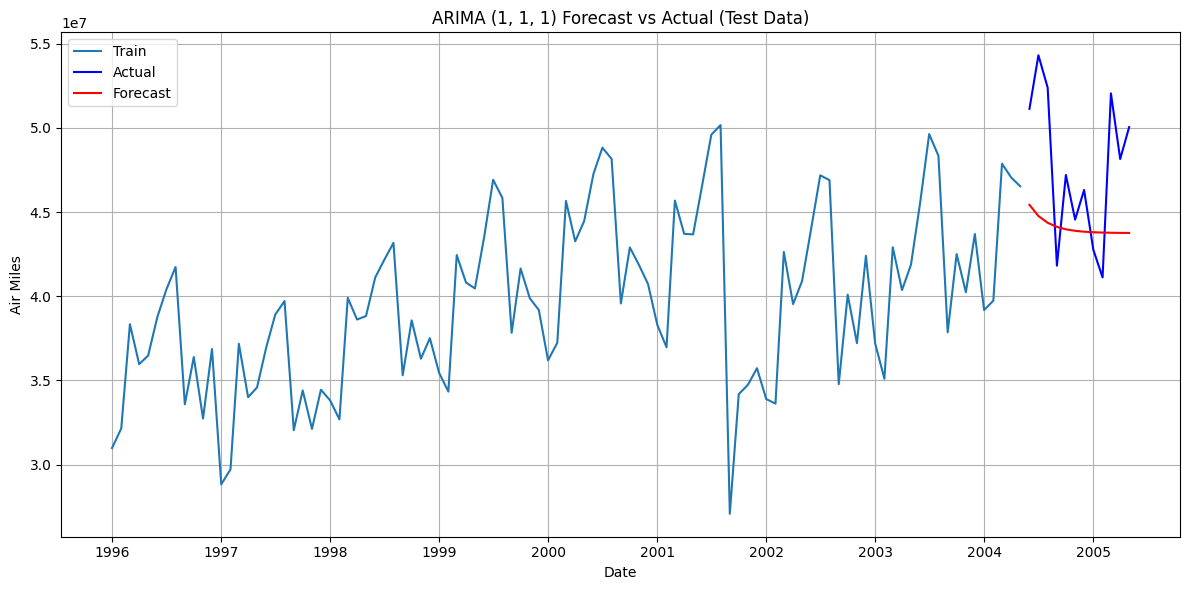

In [12]:
#Split data set
train = ts[:-12]
test = ts[-12:]

#Fit Arima model and observe the RMSE and MAPE values of the model for test data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f"The RMSE value is: {rmse}")
print(f"The MAPE value is: {mape}")

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label="Actual", color='blue')


plt.plot(forecast.index, forecast, label="Forecast", color='red')
plt.title("ARIMA (1, 1, 1) Forecast vs Actual (Test Data)")
plt.xlabel("Date")
plt.ylabel("Air Miles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Conclusion:
The Model Is Not Good Enough
While the RMSE ≈ 5.3M and MAPE ≈ 9.15% might suggest acceptable accuracy, the visual diagnostics clearly show that ARIMA(1,1,1) fails
to capture the dynamic behavior of the test data.


The RMSE value for Additive Exponential Smoothing model is: 1248110.4633702515
The MAPE value for Additive Exponential Smoothing model is: 9.14618633602277


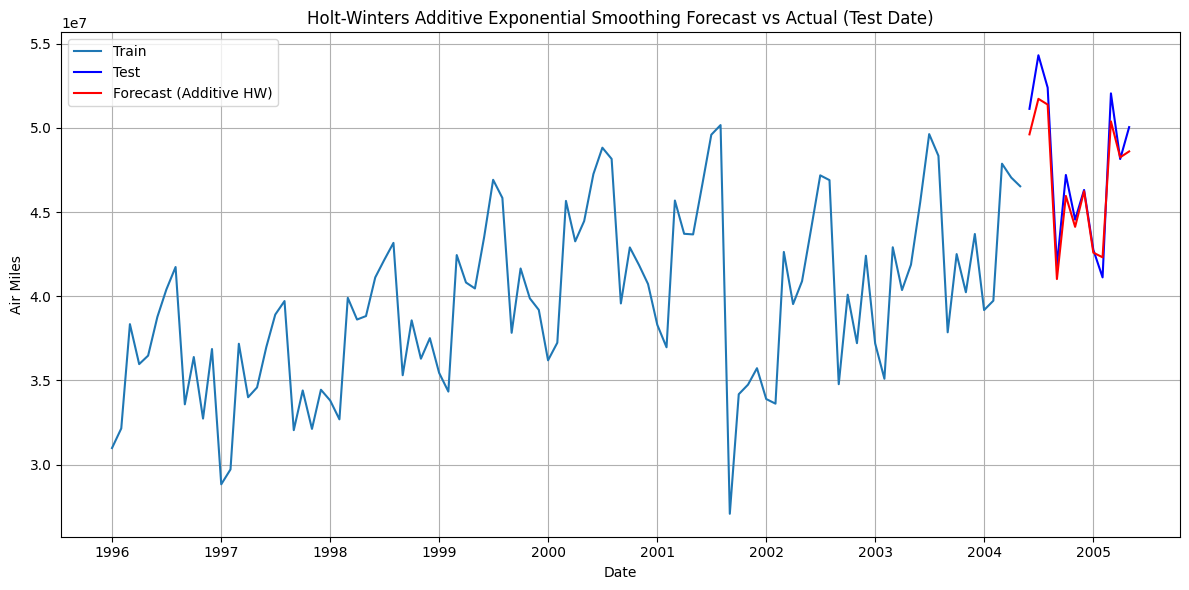

In [13]:
# Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the
#model for test data.

add_hw_model = ExponentialSmoothing(
 train,
 trend='additive',
 seasonal='additive',
 seasonal_periods=12
)
add_hw_model_fit = add_hw_model.fit()
forecast_add_hw_model = add_hw_model_fit.forecast(12)
rmse_add_hw_model = np.sqrt(mean_squared_error(test, forecast_add_hw_model))
mape_add_hw_model = mean_absolute_percentage_error(test, forecast ) * 100
print(f"The RMSE value for Additive Exponential Smoothing model is: {rmse_add_hw_model}")
print(f"The MAPE value for Additive Exponential Smoothing model is: {mape_add_hw_model}")

plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color='blue')
plt.plot(forecast_add_hw_model.index, forecast_add_hw_model, label="Forecast (Additive HW)", color='red')
plt.title("Holt-Winters Additive Exponential Smoothing Forecast vs Actual (Test Date)")
plt.xlabel("Date")
plt.ylabel("Air Miles")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Key Observations:
The forecast closely tracks the test values, following the overall trend and seasonal pattern.
The red forecast line does not exactly match the peaks and dips, but stays within reasonable bounds of the actuals.
No major divergence is visible — the lines move in sync, suggesting good seasonality modeling.
Inference:
The model effectively captures seasonal and trend patterns, characteristic of additive models.
However, some under-forecasting during peaks (Dec-Jan) and over-forecasting during dips is noticeable — common in additive models
when the actual seasonality is multiplicative in nature.

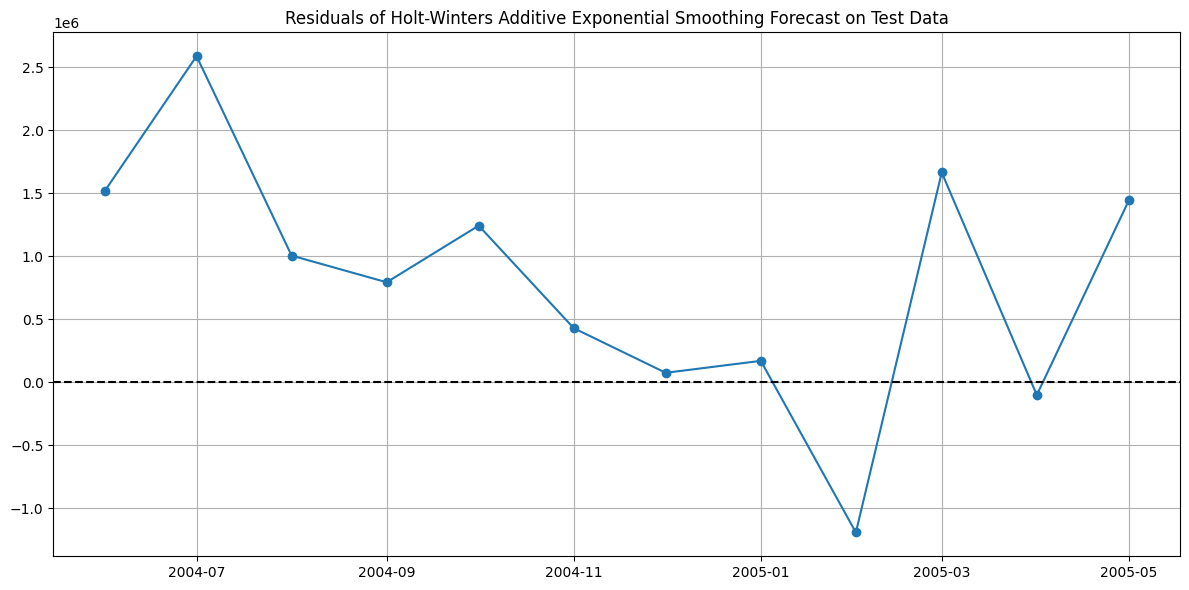

In [14]:
residuals_add_hw_model = test - forecast_add_hw_model
plt.figure(figsize=(12, 6))
plt.plot(residuals_add_hw_model, marker='o')
plt.title("Residuals of Holt-Winters Additive Exponential Smoothing Forecast on Test Data")
plt.axhline(0, linestyle='--', color='black')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:
Residuals are mostly positive, which means the forecasted values were generally lower than actuals (i.e., slight under-prediction).
A spike in residuals around mid-2004 suggests a larger forecast error in that month.
Residuals are not centered tightly around zero and show some variation — indicating that the model has some bias or cannot capture
sudden spikes/dips.
Inference:
The model is systematically underestimating some of the actual values.
Residuals do not show clear randomness — there might be structure left, meaning further model refinement (like multiplicative model or
SARIMA) could help.


The RMSE value of Holt-Winters Multiplicative Exponential Smoothing model is: 1485759.6937378393
The MAPE value of Holt-Winters Multiplicative Exponential Smoothing model is: 2.9029177777612403


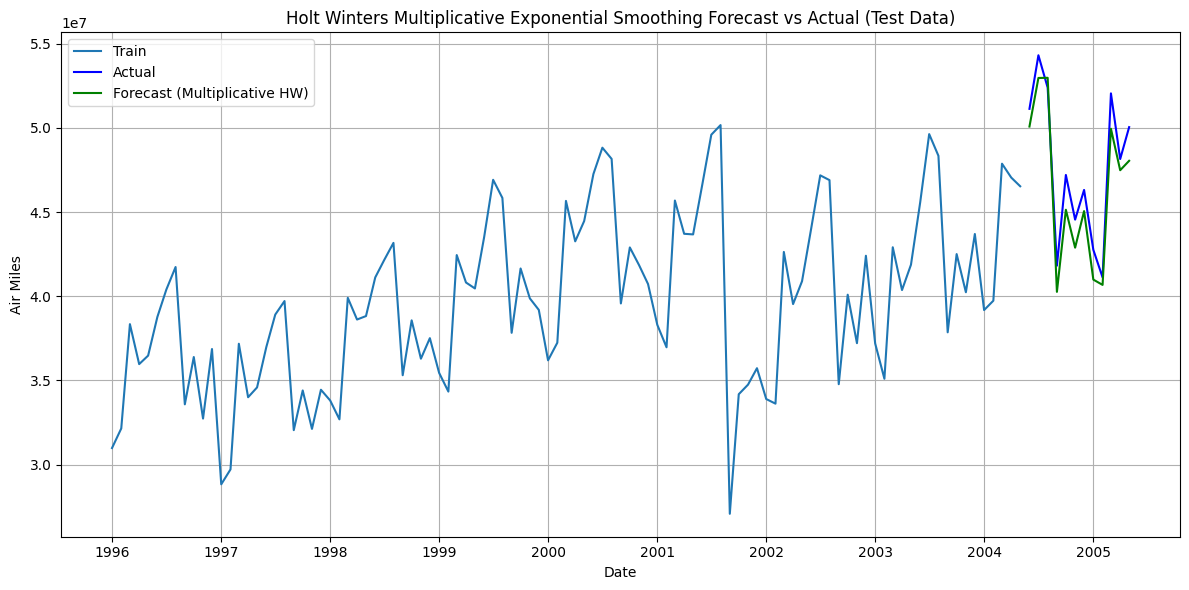

In [15]:
#Improve the Exponential Smoothing model and fit the final model. Analyze the residuals of
#this final model. Feel free to use charts or graphs to explain.

mul_hw_model = ExponentialSmoothing(
 train,
 trend='multiplicative',
 seasonal='multiplicative',
 seasonal_periods=12
)
mul_hw_model_fit = mul_hw_model.fit()
forecast_mul_hw_model = mul_hw_model_fit.forecast(12)
rmse_mul_hw_model = np.sqrt(mean_squared_error(test, forecast_mul_hw_model))
mape_mul_hw_model = mean_absolute_percentage_error(test, forecast_mul_hw_model) * 100
print(f"The RMSE value of Holt-Winters Multiplicative Exponential Smoothing model is: {rmse_mul_hw_model}")
print(f"The MAPE value of Holt-Winters Multiplicative Exponential Smoothing model is: {mape_mul_hw_model}")

plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Actual", color='blue')
plt.plot(forecast_mul_hw_model.index, forecast_mul_hw_model, label="Forecast (Multiplicative HW)", color='green')
plt.title("Holt Winters Multiplicative Exponential Smoothing Forecast vs Actual (Test Data)")
plt.xlabel("Date")
plt.ylabel("Air Miles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:
The forecast line (green) tracks the seasonal ups and downs more closely than the additive model did.
Forecast captures the sharp dips and spikes in test data with better shape alignment.
The peaks and valleys line up more accurately than with the additive model.
Interpretation:
The multiplicative model handles proportional seasonal fluctuations better.
This aligns with what’s expected in data like airline passengers or sales, where the amplitude of seasonality increases over time.
It performs particularly well in higher magnitude months (late 2004 to early 2005)

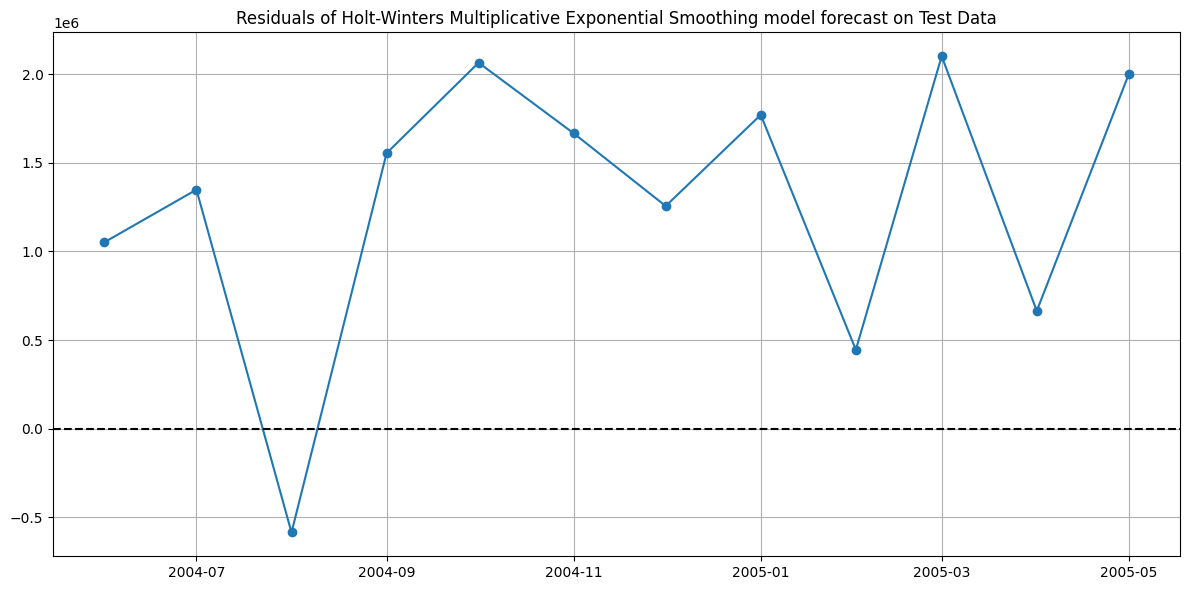

In [16]:
residuals_mul_hw_model = test - forecast_mul_hw_model
plt.figure(figsize=(12, 6))
plt.plot(residuals_mul_hw_model, marker='o')
plt.title("Residuals of Holt-Winters Multiplicative Exponential Smoothing model forecast on Test Data")
plt.axhline(0, linestyle='--', color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:
Residuals are smaller in spread than in the additive model — good!
Most residuals cluster near zero, with minimal systematic bias.
Some visible alternating positive/negative patterns may hint at mild underfitting in specific months, but not critical.
Interpretation:
Forecast errors are smaller and more balanced, suggesting less bias and better fit.
Unlike the additive model, this residual plot shows no extreme skewness or clustering — a hallmark of a more reliable forecast.

Conclusion:
The multiplicative Holt-Winters model is superior for your data because:
It better captures seasonal amplitude
It results in lower residuals
It aligns closely with the cyclical behavior of the actual time series

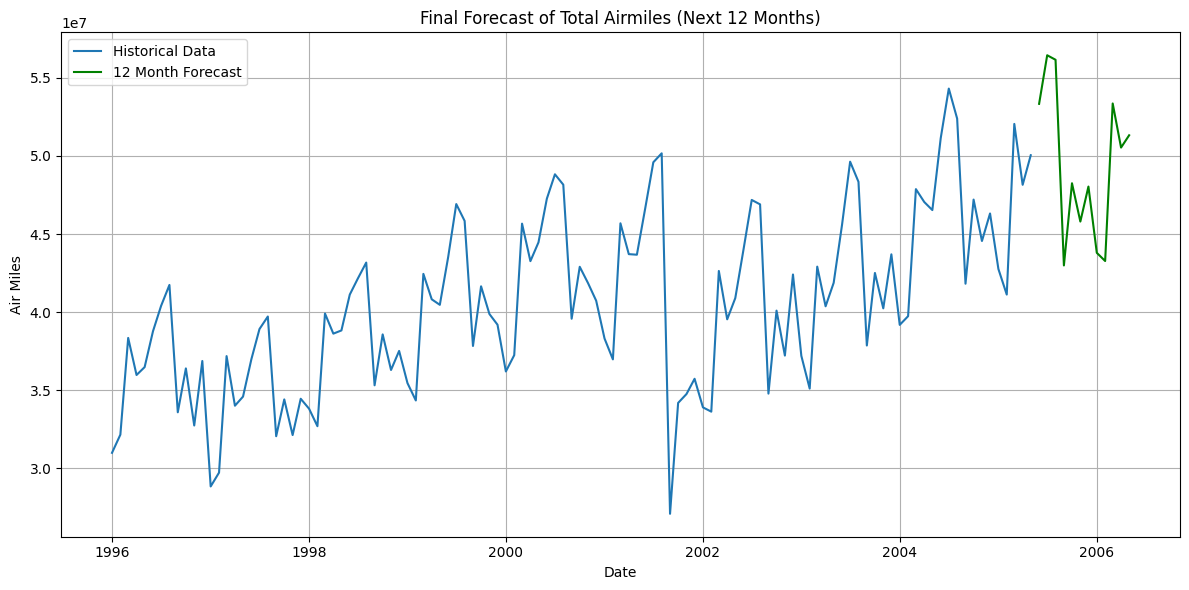

In [17]:
#Forecast Total Airmiles/records for next 12 months using the final model


final_model = ExponentialSmoothing(
 ts,
 trend="multiplicative",
 seasonal="multiplicative",
 seasonal_periods=12
)
final_model_fit = final_model.fit()
final_forecast = final_model_fit.forecast(12)
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical Data')
plt.plot(final_forecast.index, final_forecast, label="12 Month Forecast", color='green')
plt.title("Final Forecast of Total Airmiles (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Air Miles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
